# Discovery
As a first key point is to investigate what we are looking for within the dataset and why.

In recent years, public opinion and media attention have shifted to the Black Lifes Matter activist movement, which fights against racism, perpetuated at the socio-political level, toward black people.

Black Lives Matter regularly organizes demonstrations to openly protest police killings of black people, as well as broader issues such as racial profiling, police brutality, and racial inequality in the U.S. legal system.

From this dataset, we want to gain further information regarding the presence or absence of racist undercurrents within U.S. police groups and their trustworthiness.

## Issues
Through this analysis we aim to investigate the relationship of the police force with the nation's various ethnic groups.

## Objectives.
To find, if any, patterns within the data that may explain certain behavior on the part of the police.



# Data Selection
The files we will make use of will be contained in the "./AndreaScottiDataVis" folder.

In particular, I believe that all the files if properly manipulated can provide a useful overview to better understand the phenomenon.

The main idea is to study if and how the different elements are related to each other, particularly from a macroscopic point of view, so we will analyze the various phenomena divided by state rather than by single city.


#  Data Cleaning & Trasformation


In [11]:
import pandas as pd
from pandas.io.html import read_html
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from itertools import combinations
import folium.plugins as plugins
from datetime import datetime, timedelta
import requests

sns.set_style("darkgrid")

In [12]:
df = pd.read_csv("./fatal-police-shootings-data.csv")
# Drops the columns with this name
df = df.drop(columns={"id", "name", "city", "longitude", "latitude"})
df

date   manner_of_death         armed   age gender race state  \
0     2015-01-02              shot           gun  53.0      M    A    WA   
1     2015-01-02              shot           gun  47.0      M    W    OR   
2     2015-01-03  shot and Tasered       unarmed  23.0      M    H    KS   
3     2015-01-04              shot    toy weapon  32.0      M    W    CA   
4     2015-01-04              shot      nail gun  39.0      M    H    CO   
...          ...               ...           ...   ...    ...  ...   ...   
7446  2022-06-05              shot         knife   NaN      M  NaN    FL   
7447  2022-06-06              shot           gun  73.0      M  NaN    FL   
7448  2022-06-07              shot  undetermined  20.0      M  NaN    OH   
7449  2022-06-08              shot         knife   NaN    NaN  NaN    WI   
7450  2022-06-08              shot           gun  45.0      M  NaN    IA   

      signs_of_mental_illness  threat_level         flee  body_camera  \
0                        True        attack  Not fleeing        False   
1                       False        attack  Not fleeing        False   
2                       False         other  Not fleeing        False   
3                        True        attack  Not fleeing        False   
4                       False        attack  Not fleeing        False   
...                       ...           ...          ...          ...   
7446                    False         other  Not fleeing        False   
7447                    False        attack          NaN         True   
7448                    False  undetermined          NaN         True   
7449                    False         other          NaN        False   
7450                    False        attack          NaN        False   

      is_geocoding_exact  
0                   True  
1                   True  
2                   True  
3                   True  
4                   True  
...                  ...  
7446                True  
7447                True  
7448                True  
7449                True  
7450                True  

[7451 rows x 12 columns]

In [13]:
# Drops rows with NaNs
df.dropna(axis="index", how="any", subset=["race", "state"], inplace=True)

In [14]:
# Fill cells
df["gender"].fillna("O", inplace=True)

In [15]:
# I convert the values in the "armed" column with true or False
df.loc[df["armed"] == "unarmed", "armed"] = False
df.loc[df["armed"] != "unarmed", "armed"] = True
df["armed"] = df["armed"].astype("bool")

In [16]:
# I convert the date column to a correct time format
df["date"] = df["date"].astype("datetime64[ns]")

In [17]:
# I convert the values in the "flee" column with true or False
df.loc[df["flee"] == "Not fleeing", "flee"] = False
df.loc[df["flee"] != "Foot", "flee"] = True
df.loc[df["flee"] != "Car", "flee"] = True
df["flee"] = df["flee"].astype("bool")

In [18]:
# I transform the values of the remaining columns into strings
ls = ["state", "manner_of_death", "gender", "threat_level", "race"]
for titles in ls:
    df[titles] = df[titles].astype("string")
df.dtypes

date                       datetime64[ns]
manner_of_death                    string
armed                                bool
age                               float64
gender                             string
race                               string
state                              string
signs_of_mental_illness              bool
threat_level                       string
flee                                 bool
body_camera                          bool
is_geocoding_exact                   bool
dtype: object

In [19]:
df.reset_index(drop=True, inplace=True)

In [20]:
#Riordino le colonne
titles = list(df.columns)
titles[1], titles[6], titles[2], titles[3] = titles[6], titles[1], titles[
    3], titles[2]
df = df[titles]

In [21]:
df

date state   age  armed gender race   manner_of_death  \
0    2015-01-02    WA  53.0   True      M    A              shot   
1    2015-01-02    OR  47.0   True      M    W              shot   
2    2015-01-03    KS  23.0   True      M    H  shot and Tasered   
3    2015-01-04    CA  32.0   True      M    W              shot   
4    2015-01-04    CO  39.0   True      M    H              shot   
...         ...   ...   ...    ...    ...  ...               ...   
6016 2022-05-19    CA  57.0   True      M    W              shot   
6017 2022-05-26    TX  48.0   True      M    W              shot   
6018 2022-05-26    TX  58.0   True      M    W              shot   
6019 2022-05-26    TX  48.0   True      M    W              shot   
6020 2022-05-29    MO  22.0   True      M    W              shot   

      signs_of_mental_illness threat_level  flee  body_camera  \
0                        True       attack  True        False   
1                       False       attack  True        False   
2                       False        other  True        False   
3                        True       attack  True        False   
4                       False       attack  True        False   
...                       ...          ...   ...          ...   
6016                    False        other  True         True   
6017                    False       attack  True        False   
6018                    False        other  True        False   
6019                    False       attack  True        False   
6020                    False       attack  True        False   

      is_geocoding_exact  
0                   True  
1                   True  
2                   True  
3                   True  
4                   True  
...                  ...  
6016                True  
6017                True  
6018                True  
6019                True  
6020                True  

[6021 rows x 12 columns]

In [22]:
# I create a list with the names of the various states
state_list = sorted(list(df["state"].unique()))
# I create a support list
df_state_list = []
# I add to the support list each dataframe divided by state
for state in state_list:
    # I assign to the value "name" the copy of the dataframe that has the values in the "state" column == to name dello stato
    name = df[df["state"] == state].copy()
    # I remove from each datadrame the values in the format np.nan
    name.dropna(inplace=True)
    # I make sure that there are no strings with the vare "nan" in any of the dataframes
    for col in name.columns.unique():
        name.drop(name.index[name[col] == 'nan'], inplace=True)
    # I reset the index
    name.reset_index(inplace=False, drop=True)
    # I add the dataframe to the support list
    df_state_list.append(name)
df_state_list[0]

date state   age  armed gender race   manner_of_death  \
92   2015-02-08    AK  33.0   True      M    W              shot   
670  2015-09-08    AK  19.0   True      M    N              shot   
673  2015-09-09    AK  33.0   True      M    N              shot   
793  2015-10-24    AK  49.0   True      M    W              shot   
995  2016-01-12    AK  49.0   True      M    N              shot   
1076 2016-02-10    AK  36.0   True      M    N              shot   
1113 2016-02-21    AK  38.0   True      F    N              shot   
1374 2016-06-03    AK  33.0   True      M    W              shot   
1485 2016-07-12    AK  23.0   True      M    W              shot   
1600 2016-08-29    AK  28.0   True      M    N  shot and Tasered   
1777 2016-11-12    AK  40.0   True      M    W              shot   
2027 2017-02-17    AK  35.0   True      M    B              shot   
2123 2017-03-26    AK  36.0   True      M    W              shot   
2259 2017-05-25    AK  23.0   True      M    W              shot   
2321 2017-06-19    AK  21.0   True      M    N              shot   
2587 2017-10-01    AK  41.0   True      M    W              shot   
2705 2017-11-15    AK  48.0   True      M    W              shot   
2769 2017-12-24    AK  20.0   True      M    W              shot   
2975 2018-03-08    AK  27.0   True      M    N              shot   
3024 2018-03-24    AK  42.0   True      M    W              shot   
3025 2018-03-24    AK  20.0   True      M    N              shot   
3276 2018-06-29    AK  36.0   True      M    W              shot   
3294 2018-07-06    AK  38.0   True      M    A              shot   
3399 2018-08-16    AK  30.0   True      M    B              shot   
3594 2018-11-22    AK  20.0   True      M    W              shot   
3791 2019-02-13    AK  28.0   True      M    W              shot   
3845 2019-03-07    AK  23.0   True      M    W              shot   
3903 2019-03-31    AK  25.0   True      M    N              shot   
3906 2019-04-01    AK  31.0   True      M    B              shot   
4082 2019-06-16    AK  48.0   True      M    W              shot   
4550 2019-12-29    AK  34.0   True      M    W              shot   
4583 2020-01-07    AK  59.0   True      M    W              shot   
4625 2020-01-23    AK  26.0   True      M    W              shot   
4643 2020-01-29    AK  32.0   True      M    W              shot   
4683 2020-02-15    AK  16.0   True      M    A              shot   
4736 2020-03-08    AK  37.0   True      M    W              shot   
4741 2020-03-11    AK  32.0   True      F    W              shot   
5011 2020-06-23    AK  40.0   True      M    W              shot   
5287 2020-10-22    AK  43.0   True      M    W              shot   
5434 2020-12-20    AK  34.0   True      M    W              shot   
5607 2021-03-06    AK  27.0   True      M    W              shot   
5621 2021-03-13    AK  25.0   True      M    W              shot   
5798 2021-06-25    AK  23.0   True      M    W              shot   

      signs_of_mental_illness  threat_level  flee  body_camera  \
92                      False        attack  True        False   
670                     False        attack  True        False   
673                     False        attack  True        False   
793                     False        attack  True        False   
995                      True         other  True        False   
1076                    False        attack  True        False   
1113                    False        attack  True        False   
1374                    False         other  True        False   
1485                     True        attack  True        False   
1600                    False        attack  True         True   
1777                    False        attack  True        False   
2027                    False        attack  True        False   
2123                    False        attack  True        False   
2259                    False        attack  True        False   
2321                     Tru

In [23]:
# At this point I create a new backing list
states_values = []
# I introduce a for loop to have an index ranging from 0 to 50 (covering all states within the file)
for idx in enumerate(state_list):
    # I create the name of each dataframe consisting of the prefix "df_" and followed by the initials of the state
    state = f"df_{idx[1]}"
    # I initialize the dataframe by assigning it an index = idx (as we have seen idx varies from 0 to 50)
    state = pd.DataFrame(index=[idx[0]])
    # I assign the value of the state column to the second element of idx since idx occurs as (number, state initials)
    state["state"] = idx[1]
    # Now I want to make sure that each state df presents all the information regarding
    # the shootings that occurred in it, in particular I wish to obtain the conditional relative frequencies
    # to each state for each possible value contained in the columns (excluding "age," "date," and "state")
    for col in df_state_list[idx[0]].columns[3:11].unique():
        for val in df_state_list[idx[0]][col].unique():
            # I assign the renamed column as "column_name" + "value within column"
            # The corresponding relative frequency conditional on the state
            state[f"{col}_{val}"] = df_state_list[idx[0]][col].value_counts(
                normalize=True)[val].round(2)
    # I add the dead column to number how many people died by state
    state["dead"] = df["state"].value_counts(ascending=True)[idx[1]]
    # After finishing the for loops I add to the support list
    states_values.append(state)
    # Brief test to check its operation
states_values[0]

state  armed_True  gender_M  gender_F  race_W  race_N  race_B  race_A  \
0    AK         1.0      0.95      0.05    0.65    0.23    0.07    0.05   

   manner_of_death_shot  manner_of_death_shot and Tasered  \
0                  0.98                              0.02   

   signs_of_mental_illness_False  signs_of_mental_illness_True  \
0                           0.86                          0.14   

   threat_level_attack  threat_level_other  threat_level_undetermined  \
0                 0.72                0.26                       0.02   

   flee_True  body_camera_False  body_camera_True  dead  
0        1.0               0.91              0.09    43

In [24]:
# I merge each of the individual 51 dataframes into one and remove the np.nan values and replace them with the 0 values
# since np.nan occur in the case histories where the relative frequency of the particular element is 0
df_states_shootings = pd.concat([states_values[0], states_values[1]])
for idx in enumerate(states_values):
    if idx[0] < (len(states_values) - 2):
        single_state = states_values[idx[0] + 2]
        df_states_shootings = pd.concat([df_states_shootings, single_state],
                                        ignore_index=True)

In [25]:
df_states_shootings = df_states_shootings.fillna(0)
# I am removing because it is insignificant
ls = ["armed_True", "flee_True", "gender_O", "race_O"]
for titles in ls:
    df_states_shootings.drop([titles], axis=1, inplace=True)

df_states_shootings

state  gender_M  gender_F  race_W  race_N  race_B  race_A  \
0     AK      0.95      0.05    0.65    0.23    0.07    0.05   
1     AL      0.93      0.07    0.65    0.00    0.32    0.00   
2     AR      1.00      0.00    0.68    0.00    0.30    0.02   
3     AZ      0.93      0.07    0.49    0.05    0.08    0.00   
4     CA      0.95      0.05    0.31    0.00    0.19    0.04   
5     CO      0.96      0.04    0.56    0.02    0.10    0.02   
6     CT      1.00      0.00    0.43    0.00    0.24    0.00   
7     DC      0.83      0.17    0.11    0.00    0.89    0.00   
8     DE      0.92      0.08    0.46    0.00    0.46    0.00   
9     FL      0.94      0.06    0.49    0.00    0.35    0.00   
10    GA      0.92      0.07    0.47    0.00    0.45    0.01   
11    HI      0.94      0.06    0.09    0.00    0.06    0.38   
12    IA      0.92      0.08    0.79    0.00    0.21    0.00   
13    ID      0.94      0.06    0.83    0.02    0.02    0.02   
14    IL      0.96      0.04    0.30    0.00    0.57    0.00   
15    IN      0.97      0.03    0.66    0.00    0.30    0.00   
16    KS      0.93      0.07    0.67    0.02    0.15    0.00   
17    KY      0.96      0.04    0.79    0.01    0.17    0.01   
18    LA      0.98      0.02    0.40    0.00    0.56    0.02   
19    MA      1.00      0.00    0.56    0.00    0.21    0.00   
20    MD      0.96      0.04    0.30    0.00    0.65    0.01   
21    ME      0.96      0.04    0.88    0.00    0.04    0.00   
22    MI      0.97      0.03    0.61    0.00    0.35    0.01   
23    MN      0.97      0.03    0.61    0.06    0.21    0.04   
24    MO      0.93      0.07    0.58    0.00    0.39    0.01   
25    MS      0.96      0.04    0.58    0.00    0.39    0.01   
26    MT      0.97      0.03    0.86    0.14    0.00    0.00   
27    NC      0.97      0.03    0.61    0.01    0.33    0.01   
28    ND      1.00      0.00    0.46    0.54    0.00    0.00   
29    NE      0.94      0.06    0.67    0.03    0.18    0.00   
30    NH      1.00      0.00    1.00    0.00    0.00    0.00   
31    NJ      0.97      0.03    0.33    0.00    0.53    0.02   
32    NM      0.94      0.06    0.26    0.02    0.02    0.00   
33    NV      0.97      0.03    0.48    0.01    0.17    0.02   
34    NY      0.96      0.04    0.41    0.00    0.48    0.01   
35    OH      0.96      0.04    0.56    0.00    0.40    0.01   
36    OK      0.98      0.02    0.65    0.06    0.20    0.02   
37    OR      0.98      0.02    0.83    0.00    0.09    0.00   
38    PA      0.98      0.02    0.54    0.00    0.39    0.01   
39    RI      1.00      0.00    0.25    0.00    0.50    0.00   
40    SC      0.95      0.05    0.64    0.00    0.33    0.01   
41    SD      1.00      0.00    0.65    0.29    0.00    0.06   
42    TN      0.93      0.07    0.70    0.00    0.27    0.01   
43    TX      0.94      0.06    0.42    0.00    0.24    0.01   
44    UT      1.00      0.00    0.65    0.03    0.11    0.01   
45    VA      0.94      0.06    0.52    0.01    0.41    0.01   
46    VT      1.00      0.00    0.89    0.11    0.00    0.00   
47    WA      0.96      0.04    0.55    0.05    0.17    0.06   
48    WI      0.99      0.01    0.64    0.04    0.23    0.02   
49    WV      0.96      0.04    0.84    0.00    0.14    0.02   
50    WY      0.93      0.07    0.71    0.14    0.00    0.00   

    manner_of_death_shot  manner_of_death_shot and Tasered  \
0                   0.98                              0.02   
1                   0.93                              0.07   
2                   0.96                              0.04   
3                   0.96                              0.04   
4                   0.93                              0.07   
5                   0.98                              0.02   
6                   0.81                              0.19   
7                   1.00                              0.00   
8                   1.00                              0.00   
9                   0.95                              

In [26]:
df_states_shootings.describe().round(2)

gender_M  gender_F  race_W  race_N  race_B  race_A  \
count     51.00     51.00   51.00   51.00   51.00   51.00   
mean       0.96      0.04    0.57    0.04    0.25    0.02   
std        0.03      0.03    0.20    0.09    0.20    0.05   
min        0.83      0.00    0.09    0.00    0.00    0.00   
25%        0.94      0.02    0.46    0.00    0.10    0.00   
50%        0.96      0.04    0.58    0.00    0.21    0.01   
75%        0.98      0.06    0.67    0.02    0.39    0.02   
max        1.00      0.17    1.00    0.54    0.89    0.38   

       manner_of_death_shot  manner_of_death_shot and Tasered  \
count                 51.00                             51.00   
mean                   0.95                              0.05   
std                    0.04                              0.04   
min                    0.81                              0.00   
25%                    0.93                              0.02   
50%                    0.96                              0.04   
75%                    0.98                              0.07   
max                    1.00                              0.19   

       signs_of_mental_illness_False  signs_of_mental_illness_True  \
count                          51.00                         51.00   
mean                            0.76                          0.24   
std                             0.10                          0.10   
min                             0.44                          0.00   
25%                             0.72                          0.18   
50%                             0.77                          0.23   
75%                             0.82                          0.28   
max                             1.00                          0.56   

       threat_level_attack  threat_level_other  threat_level_undetermined  \
count                51.00               51.00                      51.00   
mean                  0.65                0.32                       0.03   
std                   0.10                0.09                       0.03   
min                   0.38                0.00                       0.00   
25%                   0.58                0.26                       0.01   
50%                   0.65                0.31                       0.03   
75%                   0.71                0.38                       0.04   
max                   1.00                0.50                       0.12   

       body_camera_False  body_camera_True    dead  race_H  
count              51.00             51.00   51.00   51.00  
mean                0.85              0.15  118.06    0.11  
std                 0.09              0.09  142.07    0.14  
min                 0.62              0.00    4.00    0.00  
25%                 0.82              0.09   37.50    0.02  
50%                 0.88              0.12   98.00    0.05  
75%                 0.91              0.18  125.00    0.15  
max                 1.00              0.38  852.00    0.71

## I import and clean the next 4 files.

In this section we will consider the first 4 files in the folder, they will be cleaned of data not needed for the investigation and then grouped into a single dataframe.

In [27]:
# I build a function to clean datasets
def clear_df(df_list):
    ls_clean = []
    for data in df_list:
        data = data.drop(columns={"City"})
        data.rename(columns={'Geographic Area': 'state'}, inplace=True)
        data.dropna(inplace=True)
        cols = list(data.columns)
        try:
            data.drop(data.index[data[cols[-1]].apply(
                lambda x: not (x.split(".")[0] + x.split(".")[-1]).isdigit())],
                      inplace=True)
        except AttributeError as e:
            # This error occurs because some data is already float64
            print(e)
        data[cols[-1]] = data[cols[-1]].astype("float")
        data["state"] = data["state"].astype("string")
        data = data.groupby("state").mean().round(2)
        data.reset_index(inplace=True)
        ls_clean.append(data)
    return (list(ls_clean))

In [29]:
# I import the files and remove unnecessary columns as needed
df1 = pd.read_csv("./MedianHouseholdIncome2015.csv",
                  encoding='windows-1254')
df1.rename(columns={"Median Income": "median_household_income"}, inplace=True)
df2 = pd.read_csv(
    "./PercentagePeopleBelowPovertyLevel.csv",
    encoding='windows-1254')
df3 = pd.read_csv("./PercentOver25CompletedHighSchool.csv",
                  encoding='windows-1254')
df4 = pd.read_csv("./PopulationByCity.csv",
                  encoding='windows-1254')
df4.rename(columns={"city": "City"}, inplace=True)
df4.drop(columns={"lat", "lng"}, inplace=True)
ls = [df1, df2, df3, df4]

In [30]:
# I create the final dataset of the first 4 states
df_total = pd.DataFrame([])
# I introduce in the dataset the column of states
df_total["state"] = clear_df(ls)[0]["state"]
df_total["state"] = df_total["state"].astype("string")
# I populate the dataset with salient information
for idx in range(len(ls)):
    df_total[str(clear_df(ls)[idx].columns[-1])] = clear_df(ls)[idx][str(
        clear_df(ls)[idx].columns[-1])]
df_total

'float' object has no attribute 'split'
'float' object has no attribute 'split'
'float' object has no attribute 'split'
'float' object has no attribute 'split'
'float' object has no attribute 'split'
'float' object has no attribute 'split'
'float' object has no attribute 'split'
'float' object has no attribute 'split'
'float' object has no attribute 'split'
'float' object has no attribute 'split'
'float' object has no attribute 'split'
'float' object has no attribute 'split'
'float' object has no attribute 'split'


state  median_household_income  poverty_rate  percent_completed_hs  \
0     AK                 52099.59         19.85                 84.63   
1     AL                 40577.31         20.65                 80.30   
2     AR                 35593.41         22.96                 79.95   
3     AZ                 42495.67         25.67                 80.47   
4     CA                 62097.35         17.12                 81.96   
5     CO                 58857.70         13.36                 90.11   
6     CT                 75149.65          9.14                 91.59   
7     DC                 70848.00         18.00                 89.30   
8     DE                 61792.41         12.56                 88.52   
9     FL                 49811.31         17.57                 85.74   
10    GA                 39781.80         23.78                 79.01   
11    HI                 64708.74         13.40                 91.67   
12    IA                 48116.05         12.29                 90.11   
13    ID                 42484.79         18.24                 85.17   
14    IL                 54052.71         13.88                 88.48   
15    IN                 47713.01         15.50                 86.32   
16    KS                 44838.94         14.76                 88.23   
17    KY                 45683.31         20.08                 82.37   
18    LA                 41635.91         22.34                 79.29   
19    MA                 71765.91          9.59                 92.40   
20    MD                 78126.50         10.31                 88.42   
21    ME                 45397.47         16.89                 91.43   
22    MI                 44685.51         17.90                 89.21   
23    MN                 51678.66         13.75                 89.47   
24    MO                 41747.62         20.11                 83.52   
25    MS                 35002.10         26.88                 78.47   
26    MT                 45119.98         16.51                 90.49   
27    NC                 43302.34         19.75                 83.25   
28    ND                 52141.71         12.16                 87.82   
29    NE                 46582.91         12.98                 89.99   
30    NH                 54026.32         12.66                 90.71   
31    NJ                 80584.41          8.19                 90.85   
32    NM                 40952.91         23.08                 80.98   
33    NV                 57322.97         12.47                 87.72   
34    NY                 69890.67         11.67                 90.61   
35    OH                 50457.21         14.85                 88.34   
36    OK                 40447.29         20.66                 82.91   
37    OR                 48088.07         16.52                 88.30   
38    PA                 51758.77         12.52                 89.02   
39    RI                 64537.54         10.37                 88.82   
40    SC                 39787.09         22.16                 80.85   
41    SD                 45408.26         16.03                 87.75   
42    TN                 42249.77         19.89                 81.63   
43    TX                 51335.33         19.92                 75.69   
44    UT                 60216.37         11.98                 91.62   
45    VA                 61867.68         14.59                 84.88   
46    VT                 46284.78         13.79                 89.98   
47    WA                 59315.28         15.02                 88.20   
48    WI                 50411.40         12.86                 90.26   
49    WV                 39097.12         21.13                 82.35   
50    WY                 60874.99          9.89                 92.10   

    population  
0     22792.82  
1     38201.86  
2     28360.19  
3    126936.97  
4    148340.78  
5     92993.89  
6    148397.25  
7   5289420.00  
8     32778.22  
9    127544.46  
10    74510.93  
11

##  I import and clean the last file

In [32]:
# I import the remaining file
df5 = pd.read_csv("./ShareRaceByCity.csv",
                  encoding='windows-1254')
df5.drop(columns={"City"}, inplace=True)
df5.rename(columns={"Geographic area": "state"}, inplace=True)

In [33]:
# I create a loop to clean the data in the columns inherent to the races
for races in df5.columns[1:5]:
    # I convert all values to strings in order to manipulate them
    df5[races] = df5[races].astype("string")
    # I manipulate the strings to make sure that if split and rejoined it is a number and drop those that are not
    df5.drop(df5.index[df5[races].apply(
        lambda x: not (x.split(".")[0] + x.split(".")[-1]).isdigit())],
             inplace=True)
    # I reset the data as float so I can perform the calculations
    df5[races] = df5[races].astype("float")

In [34]:
df5 = df5.groupby("state").mean().round(2)
df5.reset_index(drop=False, inplace=True)
df5

state  share_white  share_black  share_native_american  share_asian
0     AK        45.65         0.57                  45.86         1.39
1     AL        72.51        23.32                   0.66         0.48
2     AR        78.45        16.30                   0.76         0.48
3     AZ        59.93         0.95                  28.59         0.73
4     CA        71.87         2.69                   1.72         5.57
5     CO        87.77         0.92                   1.62         1.15
6     CT        86.11         4.99                   0.66         2.99
7     DC        38.50        50.70                   0.30         3.50
8     DE        76.25        15.39                   0.52         2.00
9     FL        78.67        13.37                   0.46         1.62
10    GA        62.59        30.63                   0.30         1.49
11    HI        33.37         1.07                   0.39        25.65
12    IA        96.71         0.56                   0.27         0.40
13    ID        88.82         0.30                   2.52         0.49
14    IL        90.36         4.70                   0.26         1.34
15    IN        94.82         1.69                   0.28         0.59
16    KS        92.96         0.96                   1.87         0.43
17    KY        92.23         4.42                   0.21         0.71
18    LA        64.81        30.78                   0.96         0.79
19    MA        89.67         2.80                   0.27         2.85
20    MD        72.12        19.46                   0.34         2.98
21    ME        95.69         0.82                   0.55         1.03
22    MI        90.67         4.12                   1.08         0.95
23    MN        91.80         1.00                   3.36         1.03
24    MO        90.44         5.88                   0.54         0.55
25    MS        53.80        41.83                   1.61         0.55
26    MT        84.48         0.23                  11.87         0.32
27    NC        71.52        20.40                   1.79         0.93
28    ND        92.29         0.36                   5.33         0.29
29    NE        94.72         0.42                   1.56         0.29
30    NH        95.68         0.72                   0.29         1.34
31    NJ        80.89         6.98                   0.26         5.94
32    NM        65.42         0.67                  15.34         0.49
33    NV        82.33         1.57                   5.58         2.01
34    NY        88.88         4.01                   0.36         2.72
35    OH        92.80         3.96                   0.22         0.75
36    OK        72.93         3.38                  14.38         0.43
37    OR        87.63         0.53                   2.59         1.38
38    PA        93.25         3.27                   0.16         0.99
39    RI        89.23         2.99                   0.67         1.69
40    SC        61.98        32.83                   0.46         0.74
41    SD        84.82         0.29                  12.03         0.32
42    TN        88.95         7.30                   0.32         0.64
43    TX        82.59         5.88                   0.66         1.01
44    UT        89.44         0.38                   3.87         0.77
45    VA        74.60        16.51                   0.34         3.67
46    VT        95.87         0.77                   0.37         0.91
47    WA        82.38         1.43                   3.75         3.07
48    WI        92.96         0.94                   2.62         0.79
49    WV        95.04         2.92                   0.20         0.34
50    WY        92.37         0.40                   3.10         0.39

## I merge everything into the df_total

In [35]:
for col in df5.columns:
    df_total[col] = df5[col]
df_total

state  median_household_income  poverty_rate  percent_completed_hs  \
0     AK                 52099.59         19.85                 84.63   
1     AL                 40577.31         20.65                 80.30   
2     AR                 35593.41         22.96                 79.95   
3     AZ                 42495.67         25.67                 80.47   
4     CA                 62097.35         17.12                 81.96   
5     CO                 58857.70         13.36                 90.11   
6     CT                 75149.65          9.14                 91.59   
7     DC                 70848.00         18.00                 89.30   
8     DE                 61792.41         12.56                 88.52   
9     FL                 49811.31         17.57                 85.74   
10    GA                 39781.80         23.78                 79.01   
11    HI                 64708.74         13.40                 91.67   
12    IA                 48116.05         12.29                 90.11   
13    ID                 42484.79         18.24                 85.17   
14    IL                 54052.71         13.88                 88.48   
15    IN                 47713.01         15.50                 86.32   
16    KS                 44838.94         14.76                 88.23   
17    KY                 45683.31         20.08                 82.37   
18    LA                 41635.91         22.34                 79.29   
19    MA                 71765.91          9.59                 92.40   
20    MD                 78126.50         10.31                 88.42   
21    ME                 45397.47         16.89                 91.43   
22    MI                 44685.51         17.90                 89.21   
23    MN                 51678.66         13.75                 89.47   
24    MO                 41747.62         20.11                 83.52   
25    MS                 35002.10         26.88                 78.47   
26    MT                 45119.98         16.51                 90.49   
27    NC                 43302.34         19.75                 83.25   
28    ND                 52141.71         12.16                 87.82   
29    NE                 46582.91         12.98                 89.99   
30    NH                 54026.32         12.66                 90.71   
31    NJ                 80584.41          8.19                 90.85   
32    NM                 40952.91         23.08                 80.98   
33    NV                 57322.97         12.47                 87.72   
34    NY                 69890.67         11.67                 90.61   
35    OH                 50457.21         14.85                 88.34   
36    OK                 40447.29         20.66                 82.91   
37    OR                 48088.07         16.52                 88.30   
38    PA                 51758.77         12.52                 89.02   
39    RI                 64537.54         10.37                 88.82   
40    SC                 39787.09         22.16                 80.85   
41    SD                 45408.26         16.03                 87.75   
42    TN                 42249.77         19.89                 81.63   
43    TX                 51335.33         19.92                 75.69   
44    UT                 60216.37         11.98                 91.62   
45    VA                 61867.68         14.59                 84.88   
46    VT                 46284.78         13.79                 89.98   
47    WA                 59315.28         15.02                 88.20   
48    WI                 50411.40         12.86                 90.26   
49    WV                 39097.12         21.13                 82.35   
50    WY                 60874.99          9.89                 92.10   

    population  share_white  share_black  share_native_american  share_asian  
0     22792.82        45.65         0.57                  45.86         1.39  
1     38201.86        72.51        23.32        

## I merge df_total and df_states_shootings.

In [36]:
# I use the merge function to merge the two dataframes
df_all = pd.merge(df_total, df_states_shootings, on="state")
df_all

state  median_household_income  poverty_rate  percent_completed_hs  \
0     AK                 52099.59         19.85                 84.63   
1     AL                 40577.31         20.65                 80.30   
2     AR                 35593.41         22.96                 79.95   
3     AZ                 42495.67         25.67                 80.47   
4     CA                 62097.35         17.12                 81.96   
5     CO                 58857.70         13.36                 90.11   
6     CT                 75149.65          9.14                 91.59   
7     DC                 70848.00         18.00                 89.30   
8     DE                 61792.41         12.56                 88.52   
9     FL                 49811.31         17.57                 85.74   
10    GA                 39781.80         23.78                 79.01   
11    HI                 64708.74         13.40                 91.67   
12    IA                 48116.05         12.29                 90.11   
13    ID                 42484.79         18.24                 85.17   
14    IL                 54052.71         13.88                 88.48   
15    IN                 47713.01         15.50                 86.32   
16    KS                 44838.94         14.76                 88.23   
17    KY                 45683.31         20.08                 82.37   
18    LA                 41635.91         22.34                 79.29   
19    MA                 71765.91          9.59                 92.40   
20    MD                 78126.50         10.31                 88.42   
21    ME                 45397.47         16.89                 91.43   
22    MI                 44685.51         17.90                 89.21   
23    MN                 51678.66         13.75                 89.47   
24    MO                 41747.62         20.11                 83.52   
25    MS                 35002.10         26.88                 78.47   
26    MT                 45119.98         16.51                 90.49   
27    NC                 43302.34         19.75                 83.25   
28    ND                 52141.71         12.16                 87.82   
29    NE                 46582.91         12.98                 89.99   
30    NH                 54026.32         12.66                 90.71   
31    NJ                 80584.41          8.19                 90.85   
32    NM                 40952.91         23.08                 80.98   
33    NV                 57322.97         12.47                 87.72   
34    NY                 69890.67         11.67                 90.61   
35    OH                 50457.21         14.85                 88.34   
36    OK                 40447.29         20.66                 82.91   
37    OR                 48088.07         16.52                 88.30   
38    PA                 51758.77         12.52                 89.02   
39    RI                 64537.54         10.37                 88.82   
40    SC                 39787.09         22.16                 80.85   
41    SD                 45408.26         16.03                 87.75   
42    TN                 42249.77         19.89                 81.63   
43    TX                 51335.33         19.92                 75.69   
44    UT                 60216.37         11.98                 91.62   
45    VA                 61867.68         14.59                 84.88   
46    VT                 46284.78         13.79                 89.98   
47    WA                 59315.28         15.02                 88.20   
48    WI                 50411.40         12.86                 90.26   
49    WV                 39097.12         21.13                 82.35   
50    WY                 60874.99          9.89                 92.10   

    population  share_white  share_black  share_native_american  share_asian  \
0     22792.82        45.65         0.57                  45.86         1.39   
1     38201.86        72.51        23.32      

##  Cleaning json files and finishing touches

In [37]:
# I add a column to the final dataframe with the full name of the state
page = "https://simple.wikipedia.org/wiki/List_of_U.S._states_by_traditional_abbreviation"
wikipage = read_html(page, attrs={"class": "wikitable"})
wikipage[0].drop(columns="Traditionalabbreviation", inplace=True)
wikipage[0].sort_values(by="Otherabbreviations")
wikipage[0].rename(columns={
    "State": "state_full_name",
    "Otherabbreviations": "state"
},
                   inplace=True)
wikipage[0]

state_full_name state
0                Alabama    AL
1                 Alaska    AK
2                Arizona    AZ
3               Arkansas    AR
4             California    CA
5               Colorado    CO
6            Connecticut    CT
7               Delaware    DE
8   District of Columbia    DC
9                Florida    FL
10               Georgia    GA
11                Hawaii    HI
12                 Idaho    ID
13              Illinois    IL
14               Indiana    IN
15                  Iowa    IA
16                Kansas    KS
17              Kentucky    KY
18             Louisiana    LA
19                 Maine    ME
20              Maryland    MD
21         Massachusetts    MA
22              Michigan    MI
23             Minnesota    MN
24           Mississippi    MS
25              Missouri    MO
26               Montana    MT
27              Nebraska    NE
28                Nevada    NV
29         New Hampshire    NH
30            New Jersey    NJ
31            New Mexico    NM
32              New York    NY
33        North Carolina    NC
34          North Dakota    ND
35                  Ohio    OH
36              Oklahoma    OK
37                Oregon    OR
38          Pennsylvania    PA
39          Rhode Island    RI
40        South Carolina    SC
41          South Dakota    SD
42             Tennessee    TN
43                 Texas    TX
44                  Utah    UT
45               Vermont    VT
46              Virginia    VA
47            Washington    WA
48         West Virginia    WV
49             Wisconsin    WI
50               Wyoming    WY

In [38]:
df_all = pd.merge(df_all, wikipage[0], on="state")
df_all

state  median_household_income  poverty_rate  percent_completed_hs  \
0     AK                 52099.59         19.85                 84.63   
1     AL                 40577.31         20.65                 80.30   
2     AR                 35593.41         22.96                 79.95   
3     AZ                 42495.67         25.67                 80.47   
4     CA                 62097.35         17.12                 81.96   
5     CO                 58857.70         13.36                 90.11   
6     CT                 75149.65          9.14                 91.59   
7     DC                 70848.00         18.00                 89.30   
8     DE                 61792.41         12.56                 88.52   
9     FL                 49811.31         17.57                 85.74   
10    GA                 39781.80         23.78                 79.01   
11    HI                 64708.74         13.40                 91.67   
12    IA                 48116.05         12.29                 90.11   
13    ID                 42484.79         18.24                 85.17   
14    IL                 54052.71         13.88                 88.48   
15    IN                 47713.01         15.50                 86.32   
16    KS                 44838.94         14.76                 88.23   
17    KY                 45683.31         20.08                 82.37   
18    LA                 41635.91         22.34                 79.29   
19    MA                 71765.91          9.59                 92.40   
20    MD                 78126.50         10.31                 88.42   
21    ME                 45397.47         16.89                 91.43   
22    MI                 44685.51         17.90                 89.21   
23    MN                 51678.66         13.75                 89.47   
24    MO                 41747.62         20.11                 83.52   
25    MS                 35002.10         26.88                 78.47   
26    MT                 45119.98         16.51                 90.49   
27    NC                 43302.34         19.75                 83.25   
28    ND                 52141.71         12.16                 87.82   
29    NE                 46582.91         12.98                 89.99   
30    NH                 54026.32         12.66                 90.71   
31    NJ                 80584.41          8.19                 90.85   
32    NM                 40952.91         23.08                 80.98   
33    NV                 57322.97         12.47                 87.72   
34    NY                 69890.67         11.67                 90.61   
35    OH                 50457.21         14.85                 88.34   
36    OK                 40447.29         20.66                 82.91   
37    OR                 48088.07         16.52                 88.30   
38    PA                 51758.77         12.52                 89.02   
39    RI                 64537.54         10.37                 88.82   
40    SC                 39787.09         22.16                 80.85   
41    SD                 45408.26         16.03                 87.75   
42    TN                 42249.77         19.89                 81.63   
43    TX                 51335.33         19.92                 75.69   
44    UT                 60216.37         11.98                 91.62   
45    VA                 61867.68         14.59                 84.88   
46    VT                 46284.78         13.79                 89.98   
47    WA                 59315.28         15.02                 88.20   
48    WI                 50411.40         12.86                 90.26   
49    WV                 39097.12         21.13                 82.35   
50    WY                 60874.99          9.89                 92.10   

    population  share_white  share_black  share_native_american  share_asian  \
0     22792.82        45.65         0.57                  45.86         1.39   
1     38201.86        72.51        23.32      

In [39]:
# Import from github a file a dict of a united states GeoJson file
# This step is used to graphically represent the data divided by state
geojson_url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
response = requests.get(geojson_url)
geojson = response.json()
print(len(geojson["features"]))
geojson

52


{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '01',
   'properties': {'name': 'Alabama', 'density': 94.65},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-87.359296, 35.00118],
      [-85.606675, 34.984749],
      [-85.431413, 34.124869],
      [-85.184951, 32.859696],
      [-85.069935, 32.580372],
      [-84.960397, 32.421541],
      [-85.004212, 32.322956],
      [-84.889196, 32.262709],
      [-85.058981, 32.13674],
      [-85.053504, 32.01077],
      [-85.141136, 31.840985],
      [-85.042551, 31.539753],
      [-85.113751, 31.27686],
      [-85.004212, 31.003013],
      [-85.497137, 30.997536],
      [-87.600282, 30.997536],
      [-87.633143, 30.86609],
      [-87.408589, 30.674397],
      [-87.446927, 30.510088],
      [-87.37025, 30.427934],
      [-87.518128, 30.280057],
      [-87.655051, 30.247195],
      [-87.90699, 30.411504],
      [-87.934375, 30.657966],
      [-88.011052, 30.685351],
      [-88.10416, 30.499135],
      [-88.137022

In [40]:
# I create a list in which I add the names of all the states whose information is available to track
# their outline on the map
x = 0
geojson_states = []
while x < len(geojson["features"]):
    geojson_states.append([geojson["features"][x]["properties"]["name"], x])
    x = x + 1
geojson_states = sorted(geojson_states)
geojson_states

[['Alabama', 0],
 ['Alaska', 1],
 ['Arizona', 2],
 ['Arkansas', 3],
 ['California', 4],
 ['Colorado', 5],
 ['Connecticut', 6],
 ['Delaware', 7],
 ['District of Columbia', 8],
 ['Florida', 9],
 ['Georgia', 10],
 ['Hawaii', 11],
 ['Idaho', 12],
 ['Illinois', 13],
 ['Indiana', 14],
 ['Iowa', 15],
 ['Kansas', 16],
 ['Kentucky', 17],
 ['Louisiana', 18],
 ['Maine', 19],
 ['Maryland', 20],
 ['Massachusetts', 21],
 ['Michigan', 22],
 ['Minnesota', 23],
 ['Mississippi', 24],
 ['Missouri', 25],
 ['Montana', 26],
 ['Nebraska', 27],
 ['Nevada', 28],
 ['New Hampshire', 29],
 ['New Jersey', 30],
 ['New Mexico', 31],
 ['New York', 32],
 ['North Carolina', 33],
 ['North Dakota', 34],
 ['Ohio', 35],
 ['Oklahoma', 36],
 ['Oregon', 37],
 ['Pennsylvania', 38],
 ['Puerto Rico', 51],
 ['Rhode Island', 39],
 ['South Carolina', 40],
 ['South Dakota', 41],
 ['Tennessee', 42],
 ['Texas', 43],
 ['Utah', 44],
 ['Vermont', 45],
 ['Virginia', 46],
 ['Washington', 47],
 ['West Virginia', 48],
 ['Wisconsin', 49],
 ['

In [41]:
# I compare the previous list with the list of states for which we have data
states_to_drop = []
for states, idx in geojson_states:
    if not states in sorted(list(df_all["state_full_name"].unique())):
        states_to_drop.append([states, idx])
# This list will represent states about which we have no information and which should be removed from the file
# GeoJson
states_to_drop

[['Puerto Rico', 51]]

In [42]:
# I remove from the dictionary the state for which we have no data
for states, idx in states_to_drop:
    del geojson["features"][idx]
# We can see that in fact we have gone from 52 states to 51
print(len(geojson["features"]))

51


In [43]:
# I added the different features to the GeoJson file to represent the pop ups for each state
def add_to_geojson():
    c = df_all.set_index("state_full_name")
    for state in geojson["features"]:
        for col in sorted(c.columns.unique()):
            if col != "state":
                state["properties"][col] = (c.loc[state["properties"]["name"],
                                                  col]).astype(float)


# I invoke the function that populates the json file with its inherent data characteristics
add_to_geojson()

## Creazione dataframe per heatmap

In [45]:
df6 = pd.read_csv("./fatal-police-shootings-data.csv")
# Drops columns with these names
df6 = df6.drop(
    columns={
        "id", "age", "name", "city", "manner_of_death", "armed",
        "signs_of_mental_illness", "threat_level", "flee", "body_camera",
        "is_geocoding_exact"
    })

df6.dropna(subset=["longitude", "latitude"], how="any", inplace=True)
df6.set_index("date", drop=True, inplace=True)
df6[["longitude", "latitude"]] = df6[["longitude", "latitude"]].astype(float)
hm = df6[["latitude", "longitude"]].values.tolist()
df6

gender race state  longitude  latitude
date                                             
2015-01-02      M    A    WA   -123.122    47.247
2015-01-02      M    W    OR   -122.892    45.487
2015-01-03      M    H    KS    -97.281    37.695
2015-01-04      M    W    CA   -122.422    37.763
2015-01-04      M    H    CO   -104.692    40.384
...           ...  ...   ...        ...       ...
2022-06-05      M  NaN    FL    -81.329    29.889
2022-06-06      M  NaN    FL    -80.227    25.879
2022-06-07      M  NaN    OH    -82.911    40.020
2022-06-08    NaN  NaN    WI    -87.899    44.863
2022-06-08      M  NaN    IA    -90.600    41.574

[6739 rows x 5 columns]

# Data visualization
## Deaths by state

In [46]:
# I created a function that will come in handy for later analysis
# Adds the corresponding thematic map with related tool tips to the specified map
def choroplet_generator(dataframe, column, Map, layer_name, legenda, color,
                        bins_n):
    # Creo la mappa tematica
    cp = folium.Choropleth(
        geo_data=geojson,
        data=dataframe,
        columns=["state_full_name", column],
        key_on="feature.properties.name",
        fill_color=color,
        nan_fill_color='black',
        fill_opacity=0.7,
        line_opacity=0.5,
        bins=bins_n,
        name=layer_name,
        legend_name=legenda,
        show=False,
        control=True).add_to(
            Map)  # I add it to the map passed as a variable
    # I add overlay messages for each state by drawing from the geojson file edited earlier
    folium.GeoJsonTooltip(['name', str(column)]).add_to(cp.geojson)

Text(0, 0.5, 'Number of deaths by state')

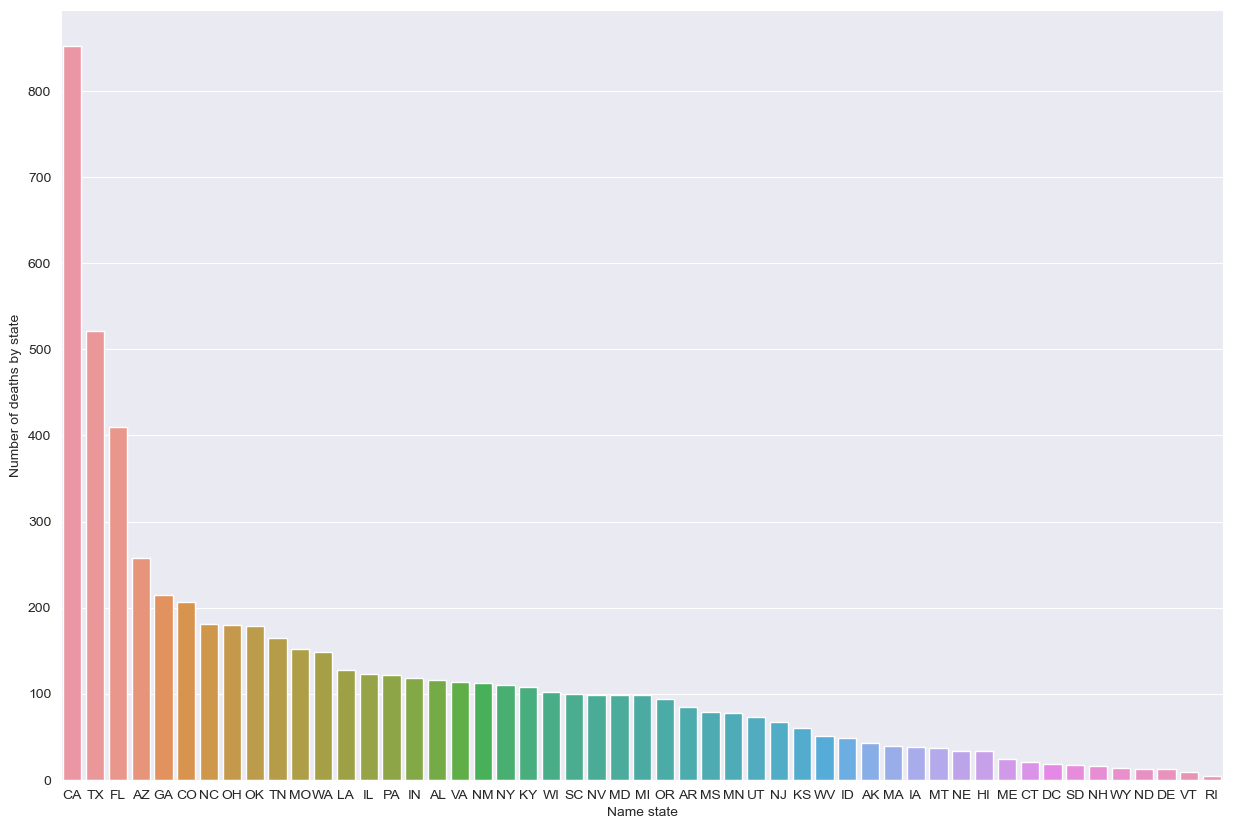

In [47]:
plt.figure(figsize=(15, 10))
k = df_all.sort_values(by=["dead"], axis=0, ascending=False)
sns.barplot(x="state", y="dead", data=k)
plt.xlabel('Name state')
plt.ylabel('Number of deaths by state')

Text(0, 0.5, '% of women killed in the shootings')

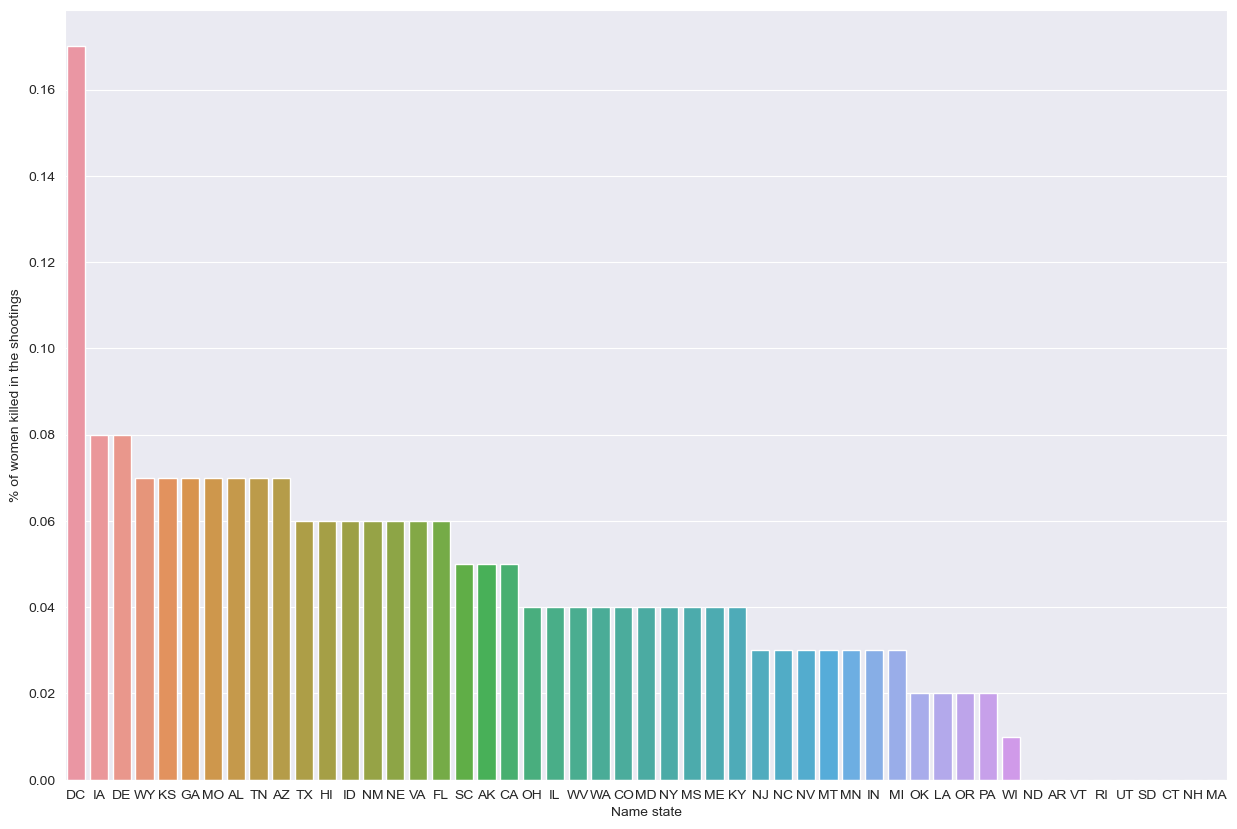

In [48]:
plt.figure(figsize=(15, 10))
k2 = df_all.sort_values(by=["gender_F"], axis=0, ascending=False)
sns.barplot(x="state", y="gender_F", data=k2)
plt.xlabel("Name state")
plt.ylabel('% of women killed in the shootings')

Text(0, 0.5, '% of men killed in shootings (0.0 - 1)')

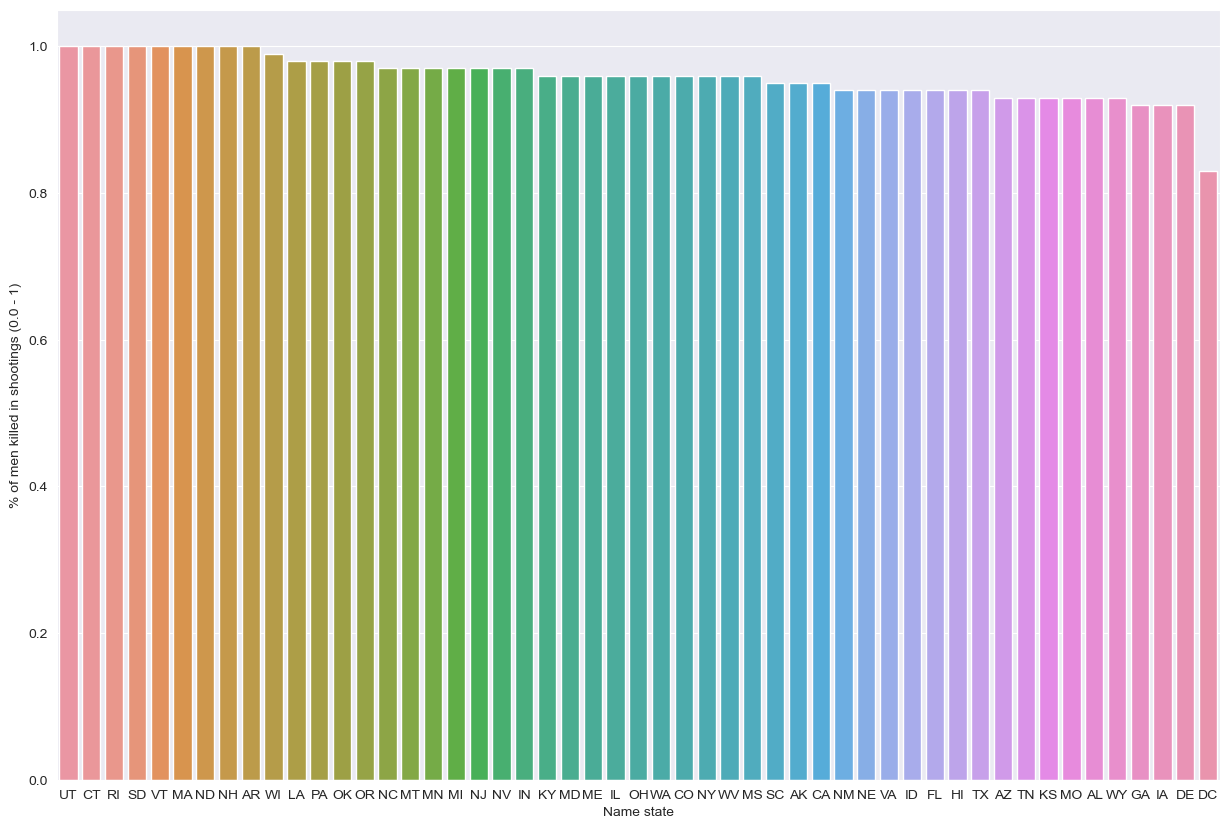

In [49]:
plt.figure(figsize=(15, 10))
k3 = df_all.sort_values(by=["gender_M"], axis=0, ascending=False)
sns.barplot(x="state", y="gender_M", data=k3)
plt.xlabel('Name state')
plt.ylabel('% of men killed in shootings (0.0 - 1)')

In [50]:
# Creating a map
m1 = folium.Map(location=[48, -102], zoom_start=3)
# Adding a heatmap layer to indicate hotspots
plugins.HeatMap(data=hm,
                gradient=None,
                name="Heat map",
                min_opacity=1,
                radius=3,
                show=False,
                control=True,
                overlay=True,
                blur=4.5).add_to(m1)
# I invoke the function that creates thematic maps
choroplet_generator(df_all, "dead", m1, "Morti per stato",
                    "Numero di morti per stato (dal 2015 al 2022)", "OrRd", 9)

choroplet_generator(df_all, "gender_F", m1, "Donne",
                    "% di donne morte per stato (dal 2015 al 2022)", "Purples",
                    9)

choroplet_generator(df_all, "gender_M", m1, "Uomini",
                    "% di uomini morti per stato (dal 2015 al 2022)", "Blues",
                    9)
# I add a toggle to turn the various layers of the thematic maps on and off
folium.LayerControl().add_to(m1)
m1

From the above graphs we can understand how most of the victims are men.

## Age of the victims

Text(0, 0.5, 'Age')

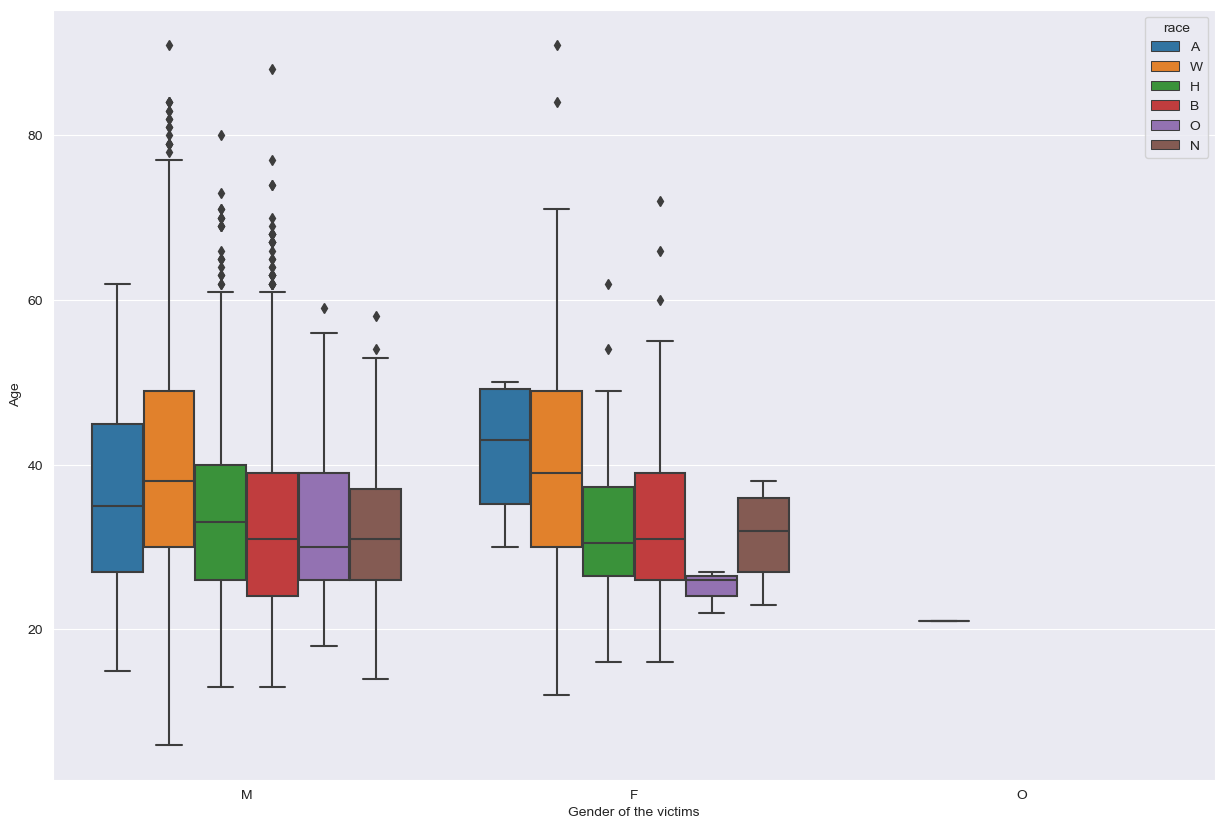

In [51]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="gender", y="age", hue="race", data=df)
plt.xlabel('Gender of the victims')
plt.ylabel('Age')

From this graph we can see some peculiarities:

1) Blacks (both males and females) who died in the shootings at least 75% of them were < 40 years old.

2) Among the black victims we notice a large presence of outliers, people with ages too far outside the observed range (e.g., some people died who were >> 40 years old).

3) The ethnic group with the most varied data is whites, in fact we note that the tails of the boxplots are very long and the IQR (interquantile difference) is larger than for the other ethnic groups. 

## Poverty indicators

In [52]:
# Useful function to create a mask to better represent correlation heatmaps
def corr_triangle(dt):
    mask = np.zeros_like(dt)
    trinangle_indeces = np.triu_indices_from(mask)
    mask[trinangle_indeces] = True
    return (mask)

In [53]:
# I created a function to help me calculate the regression coefficient between 2 columns of a dataframe
def corr_coeff_2col(df, x, y):
    # I calculate the averages of the two columns
    x_mean = df[x].mean()
    y_mean = df[y].mean()
    # Calculating the standard deviation
    x_std = df[x].std()
    y_std = df[y].std()
    # Standardization
    total_prod = (((df[x] - x_mean) / x_std) *
                  (((df[y] - y_mean) / y_std))).sum()
    corr = total_prod / (df.shape[0] - 1)
    return corr

In [54]:
# I created a function that uses combinatorial calculus to graphically represent data
# This is utilile to verify the data provided by correlation since it is possible that patterns may occur
def corr_graph_check(col_list, data_df):
    k = list(combinations(col_list, 2))
    for col in k:
        sns.jointplot(x=data_df[col[0]],
                      y=data_df[col[1]],
                      kind="reg",
                      data=data_df)
        plt.show()

In [55]:
ls = ["poverty_rate", "percent_completed_hs", "median_household_income"]
ls1 = []
for idx in range(len(ls)):
    ls1.append(df_all.sort_values(by=str(ls[idx]), axis=0, ascending=False))

Text(0, 0.5, '% of people below the poverty level (0 - 100)')

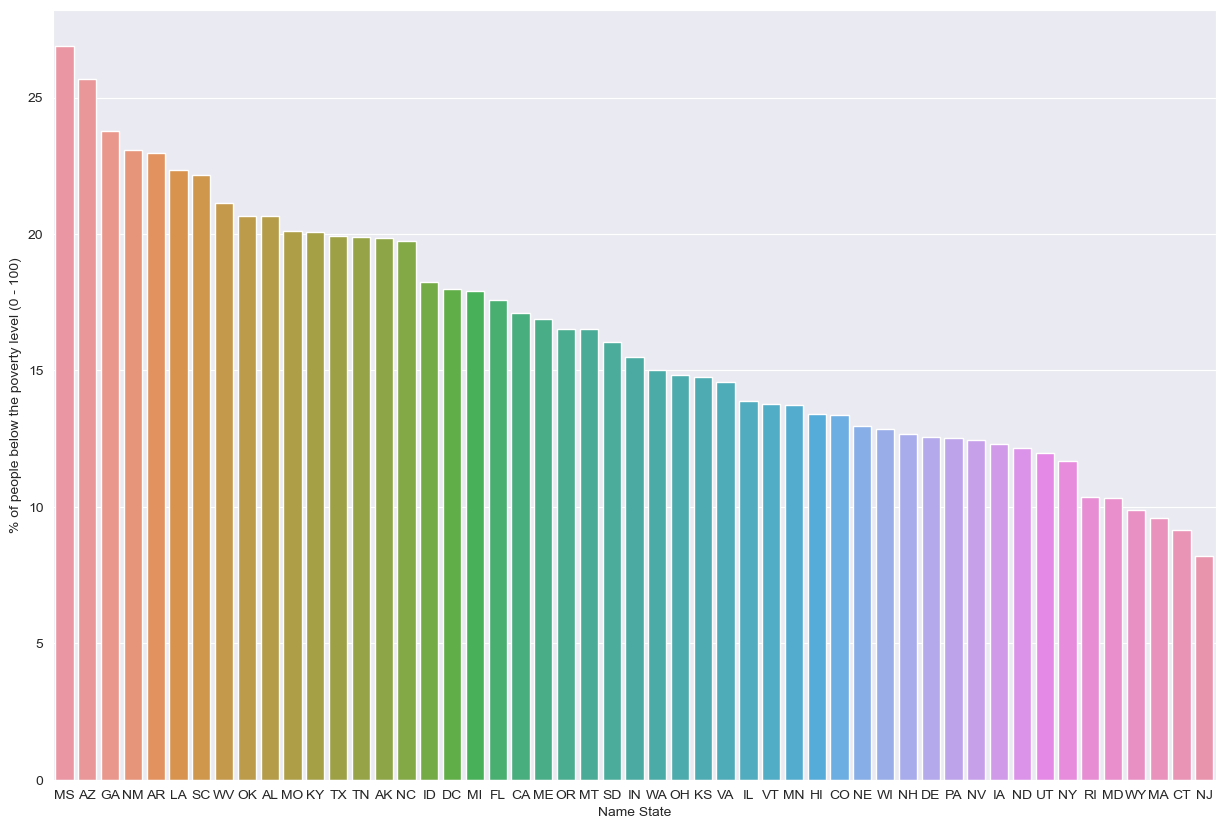

In [56]:
plt.figure(figsize=(15, 10))
sns.barplot(x="state", y=ls[0], data=ls1[0])
plt.xlabel('Name State')
plt.ylabel('% of people below the poverty level (0 - 100)')

Text(0, 0.5, '% of people who completed high school (0 - 100)')

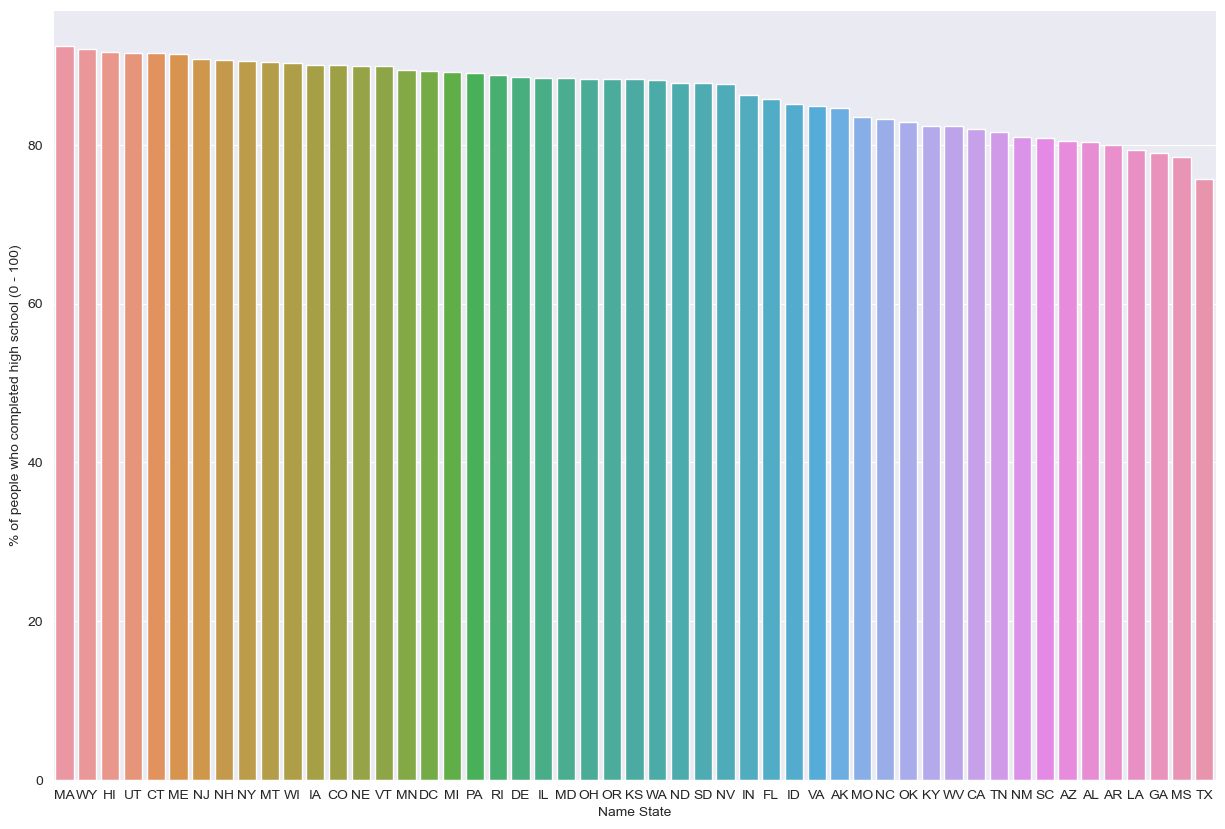

In [57]:
plt.figure(figsize=(15, 10))
sns.barplot(x="state", y=ls[1], data=ls1[1])
plt.xlabel('Name State')
plt.ylabel('% of people who completed high school (0 - 100)')

Text(0, 0.5, 'Average annual income per household ($)')

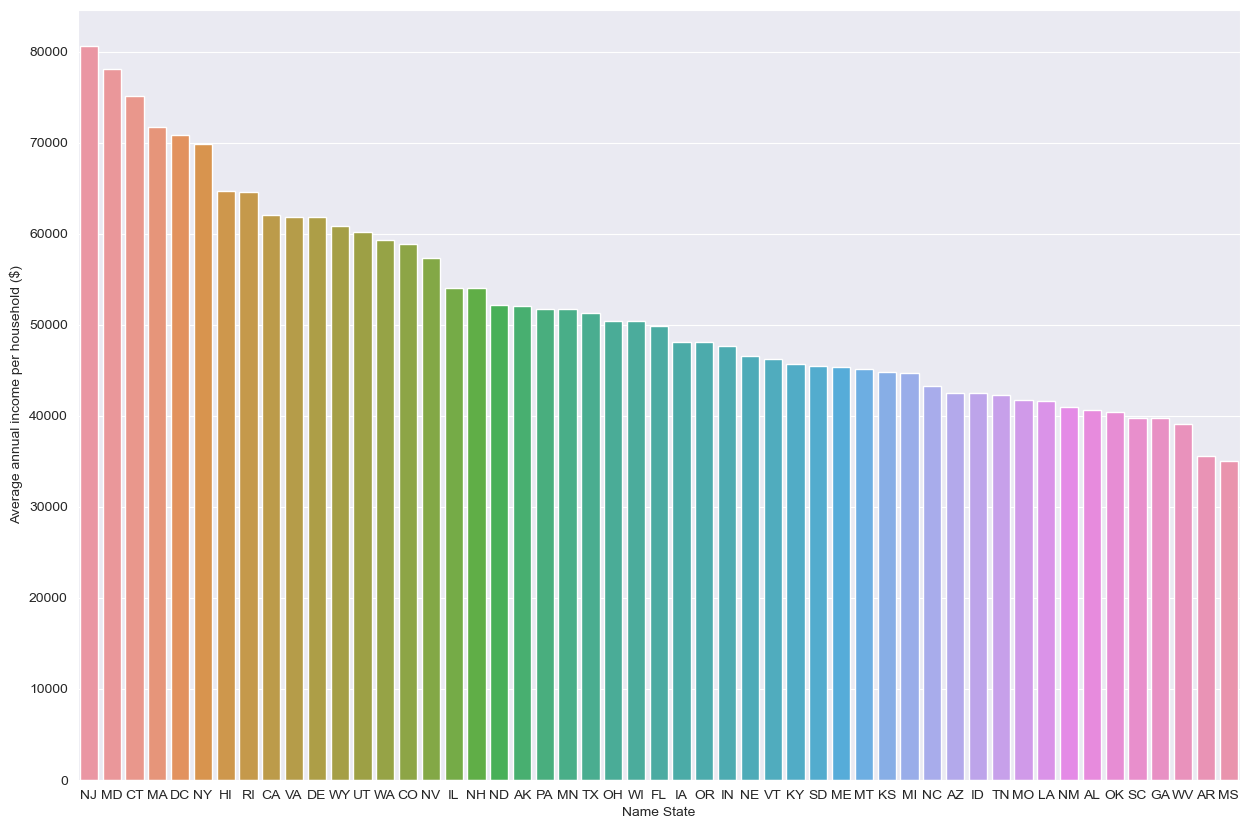

In [58]:
plt.figure(figsize=(15, 10))
sns.barplot(x="state", y=ls[2], data=ls1[2])
plt.xlabel('Name State')
plt.ylabel('Average annual income per household ($)')

In [59]:
# Creating a map
m2 = folium.Map(location=[48, -102], zoom_start=3)
# I invoke the function that creates thematic maps
choroplet_generator(df_all, ls[0], m2, "Poverty by state",
                    "% of people below the poverty level", "OrRd", 9)
choroplet_generator(df_all, ls[1], m2, "Degree of education",
                    "% of people who have completed high school",
                    "RdYlGn", 9)
choroplet_generator(df_all, ls[2], m2, "Average income",
                    "Average annual income per household", "RdYlGn", 6)
# I add a toggle to turn the various layers of the thematic maps on and off
folium.LayerControl().add_to(m2)
m2

We can see how wealth and educational attainment would seem to be correlated with each other, in fact the richest states would also seem to be the most educated and tend to be those in the northeast.

In fact, we note that the poverty indicator might have a negative correlation value since it decreases in the richest states.

<AxesSubplot:>

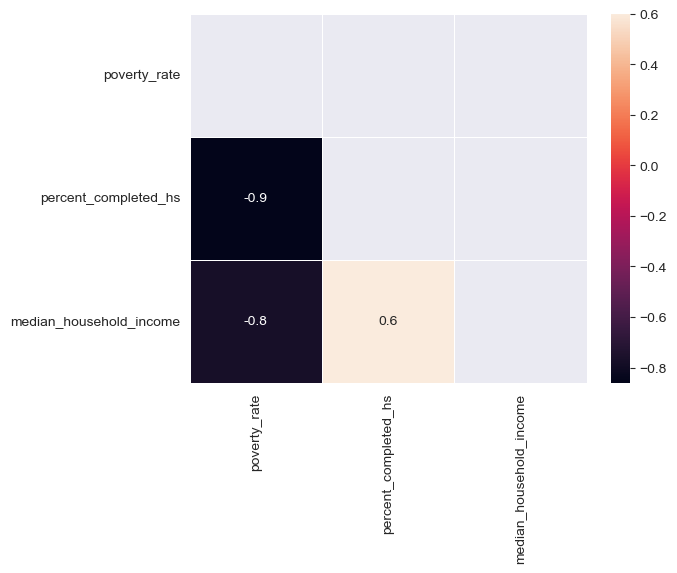

In [60]:
data1 = df_all[[ls[0], ls[1], ls[2]]].corr()
sns.heatmap(data1,
            annot=True,
            mask=corr_triangle(data1),
            linewidths=0.5,
            linecolor="white",
            fmt='.1f')

In fact, we note that, as hypothesized earlier, the poverty index has a very strong negative average dependence factor with respect to: the average annual income per household and the % of people who have completed high school.

This means that as the poverty rate increased, the average annual income and the % of people who completed high school decreased.

In contrast, we note that average income is positively correlated with the % of people who completed high school.

These data support our thesis, in fact higher educational attainment corresponds to higher wealth.

0.28

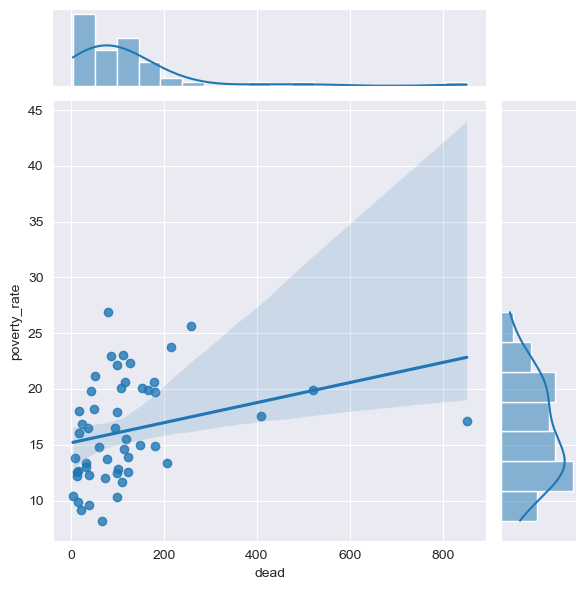

In [61]:
sns.jointplot(x="dead", y="poverty_rate", kind="reg", data=df_all)
corr_coeff_2col(df_all, "dead", "poverty_rate").round(2)

The graph shows a possible positive correlation between the number of deaths by state and the poverty index.

As the poverty index increases, it would seem that the number of deaths would also increase.

Indeed, we note that this is a value > 0.

0.0

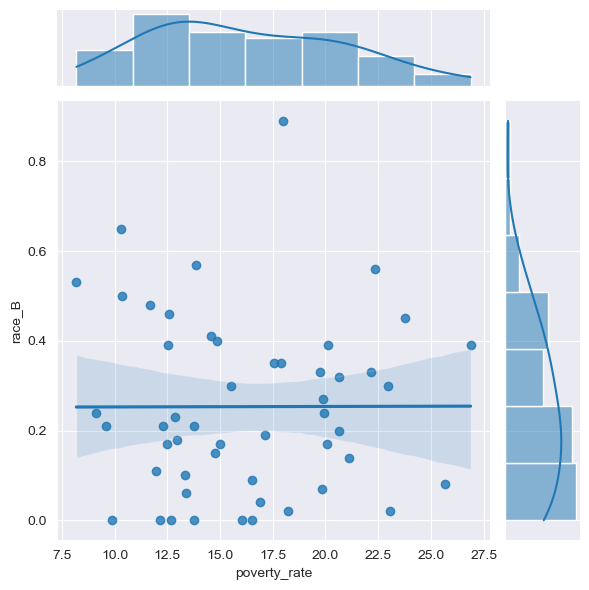

In [62]:
sns.jointplot(x="poverty_rate", y="race_B", kind="reg", data=df_all)
corr_coeff_2col(df_all, "poverty_rate", "race_B").round(2)

It is understood that there is independence between the poverty rate and the % of blacks killed.

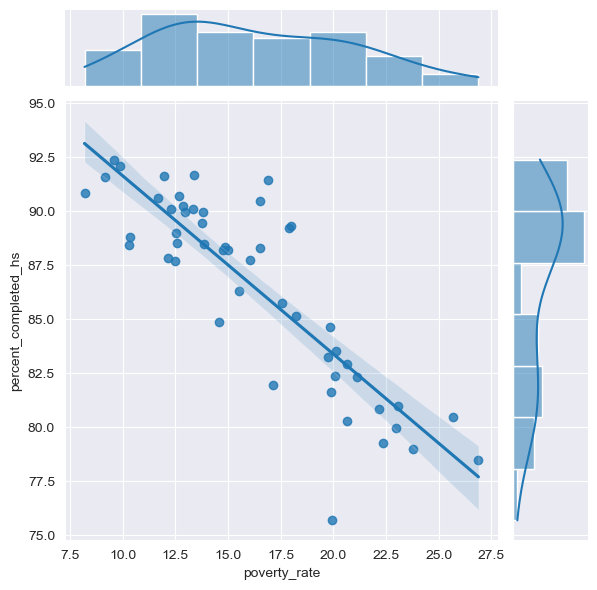

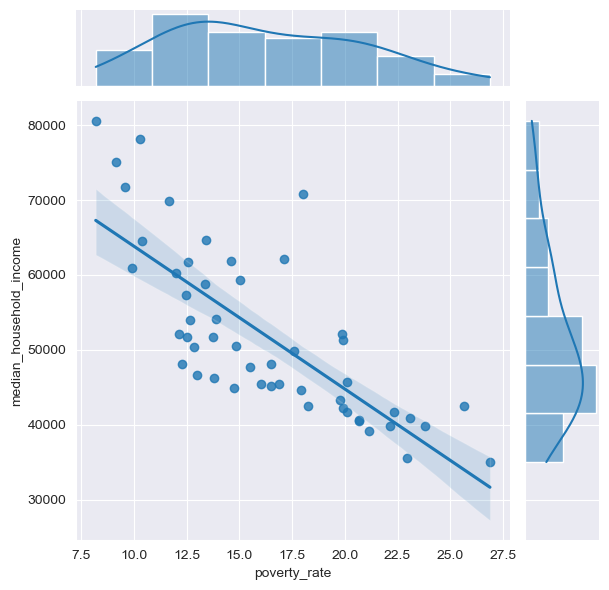

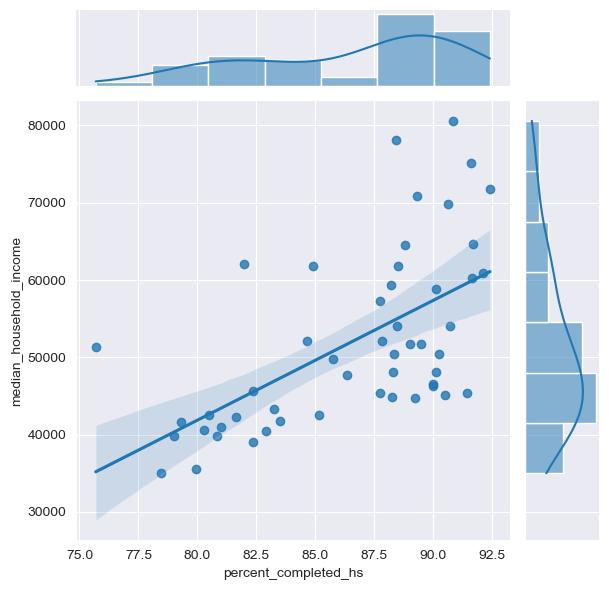

In [63]:
corr_graph_check(ls, df_all)

The creation of these graphs is preparatory to the study of correlation; in fact, they were created to investigate the behavior of the correlation line.

## Ethnicity distribution

In [64]:
ls2 = ["share_white", "share_black", "share_native_american", "share_asian"]
# Creating a map
m3 = folium.Map(location=[48, -102], zoom_start=3)
# I invoke the function that creates thematic maps
for val in ls2:
    choroplet_generator(df_all, str(val), m3, str(val),
                        f"% of {val} for each State", "Blues", 9)
# I add a toggle to turn the various layers of the thematic maps on and off
folium.LayerControl().add_to(m3)
m3

We immediately notice how there is a difference between the distribution of ethnic groups geographically.

In fact, whites are located more in the north of the united states ( areas that tend to be more affluent) while blacks are located more in the southern states ( states with generally higher poverty idicators).

Therefore, I believe the conditions are present for conducting a correlation study on these data.

In [65]:
ls3 = ["race_W", "race_B", "race_N", "race_A", "race_H"]

m4 = folium.Map(location=[48, -102], zoom_start=3)

for val in ls3:
    choroplet_generator(df_all, str(val), m4, str(val),
                        f"% of {val} deaths by single state (0.0 - 1)",
                        "Greys", 9)

folium.LayerControl().add_to(m4)
m4

This graph allows us to understand how deaths are distributed geographically.

<AxesSubplot:>

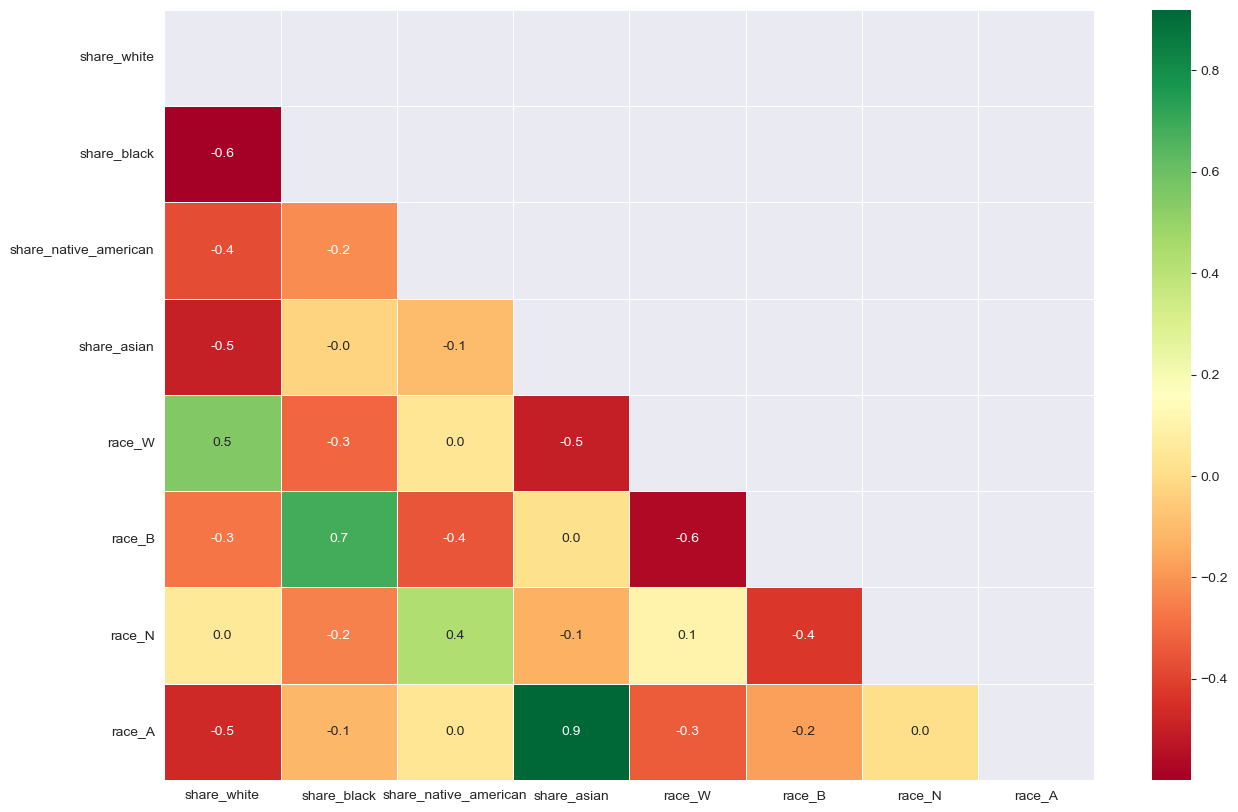

In [66]:
plt.figure(figsize=(15, 10))
data2 = df_all[[
    ls2[0], ls2[1], ls2[2], ls2[3], ls3[0], ls3[1], ls3[2], ls3[3]
]]
sns.heatmap(data2.corr(),
            mask=corr_triangle(data2.corr()),
            cmap="RdYlGn",
            annot=True,
            linewidths=0.5,
            linecolor="white",
            fmt='.1f')

From this graph we can understand how the number of deaths of a certain ethnicity depends on average on the number of people of that same ethnicity living in the state.

Example:
The number of blacks killed by the police increases as the number of blacks living in a given state increases.

## Wealth distribution among ethnic groups.

<AxesSubplot:>

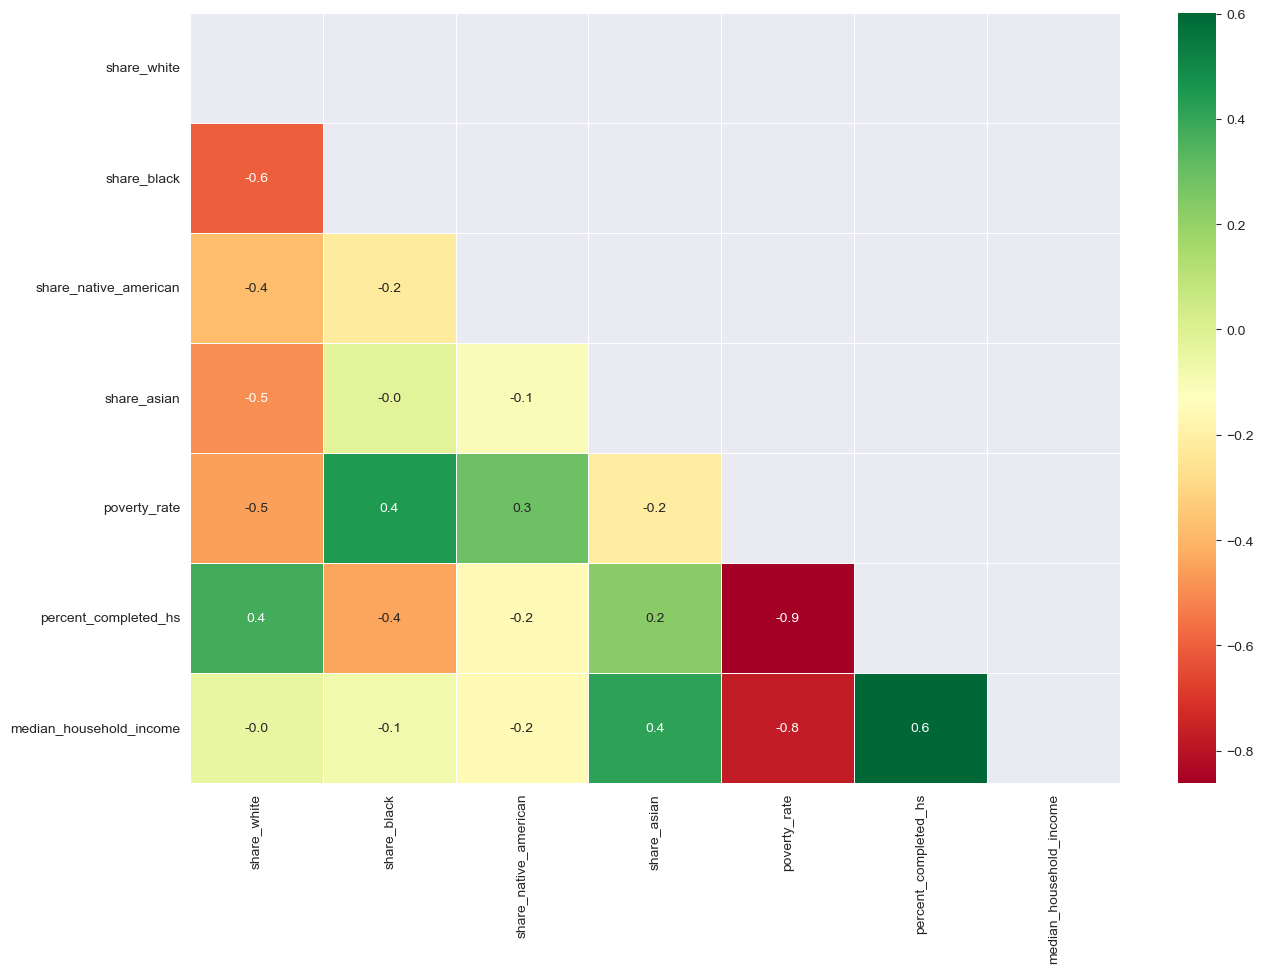

In [67]:
plt.figure(figsize=(15, 10))
data3 = df_all[[ls2[0], ls2[1], ls2[2], ls2[3], ls[0], ls[1], ls[2]]]
sns.heatmap(data3.corr(),
            mask=(corr_triangle(data3.corr())),
            cmap="RdYlGn",
            annot=True,
            linewidths=0.5,
            linecolor="white",
            fmt='.1f')

Here, on the other hand, we note how wealth is mainly held by the white and to a small extent Asian ethnicity, while blacks and Native Americans are the social groups with the most difficulties.

An interesting finding is that average annual income depends little or almost nothing on the number of people of a given ethnicity living in the same area, except in the case of people of Asian descent.

## Distribution of mental illnesses.

In [68]:

m5 = folium.Map(location=[48, -102], zoom_start=3)

choroplet_generator(
    df_all, "signs_of_mental_illness_True", m5, "Mental illnesses",
    "% of people with mental illness who were killed by state (0.0 - 1)",
    "PuRd", 9)

folium.LayerControl().add_to(m5)
m5

This graph allows us to visualize how the % of cases where the person who was killed by the police suffered from mental illness varies.

Interestingly, there is a higher % of cases when moving to the northern part of the united states.

<AxesSubplot:>

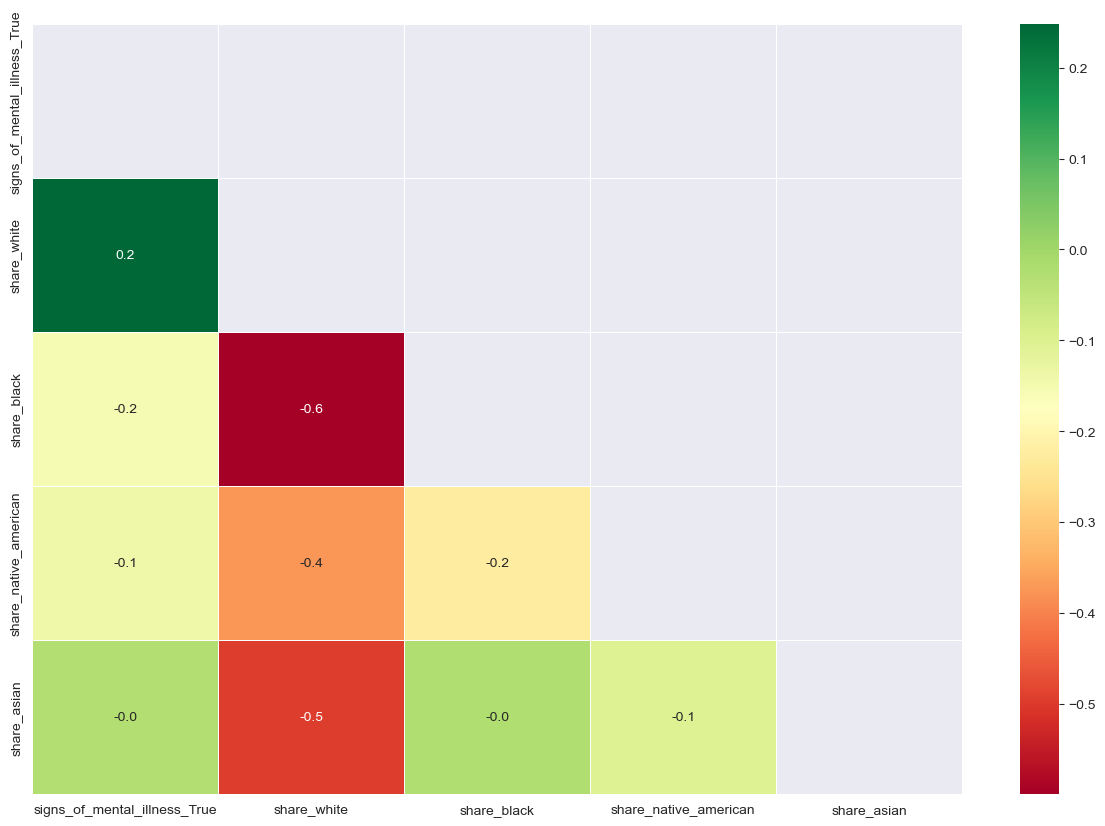

In [69]:
plt.figure(figsize=(15, 10))
data4 = df_all[[
    "signs_of_mental_illness_True", ls2[0], ls2[1], ls2[2], ls2[3]
]]
sns.heatmap(data4.corr(),
            mask=(corr_triangle(data4.corr())),
            cmap="RdYlGn",
            annot=True,
            linewidths=0.5,
            linecolor="white",
            fmt='.1f')

This graph shows us how the number of cases of mental illness depends in small part on the amount of white people in a state.

<AxesSubplot:>

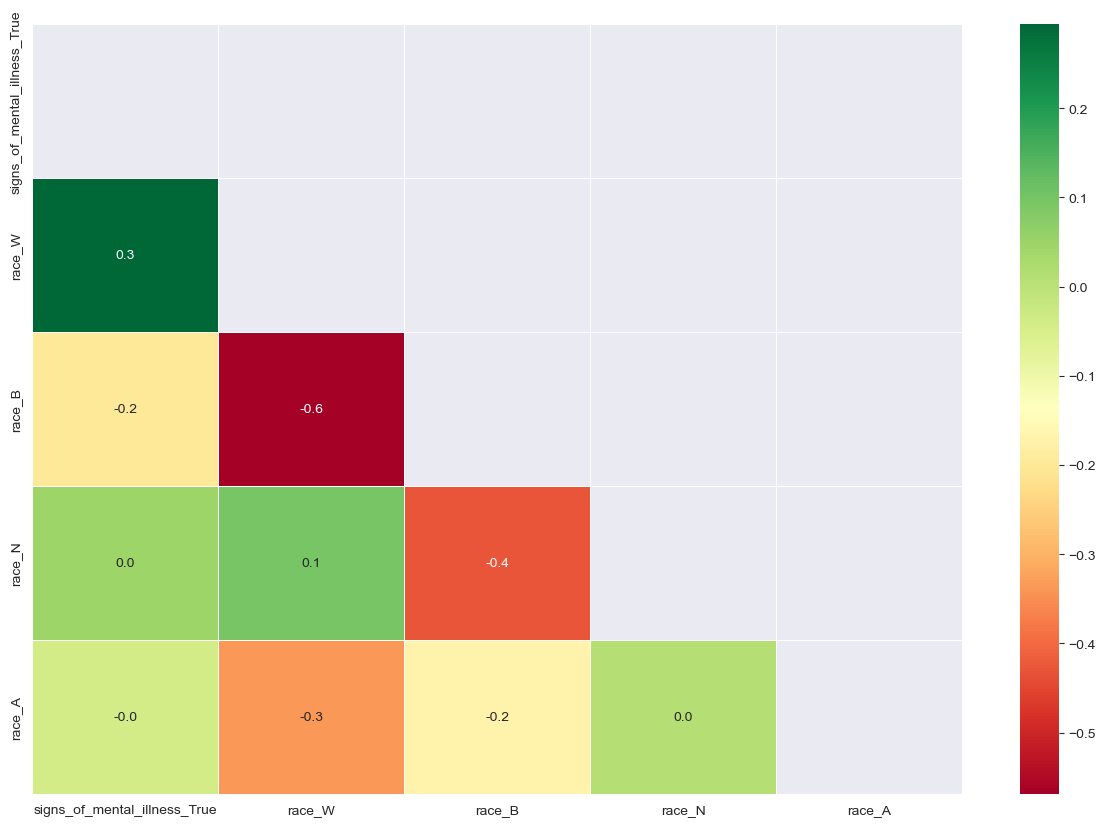

In [70]:
plt.figure(figsize=(15, 10))
data5 = df_all[[
    "signs_of_mental_illness_True", ls3[0], ls3[1], ls3[2], ls3[3]
]]
sns.heatmap(data5.corr(),
            mask=(corr_triangle(data5.corr())),
            cmap="RdYlGn",
            annot=True,
            linewidths=0.5,
            linecolor="white",
            fmt='.1f')

0.32

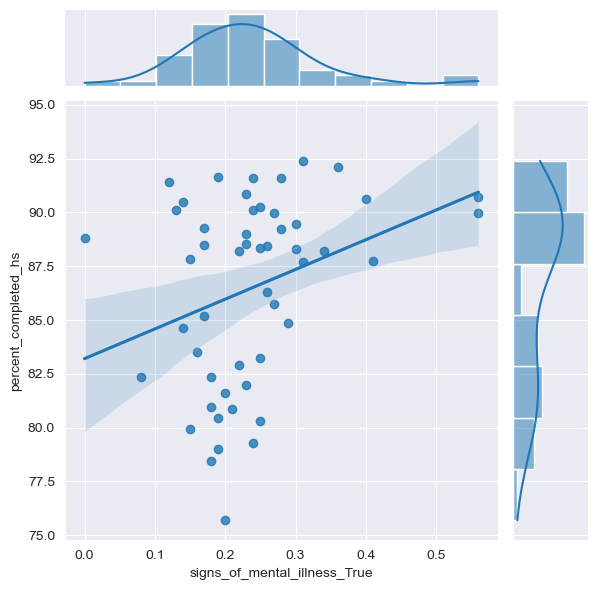

In [71]:
sns.jointplot(x=df_all["signs_of_mental_illness_True"],
              y=df_all[ls[1]],
              kind="reg",
              data=df_all)
corr_coeff_2col(df_all, "signs_of_mental_illness_True",
                "percent_completed_hs").round(2)

-0.32

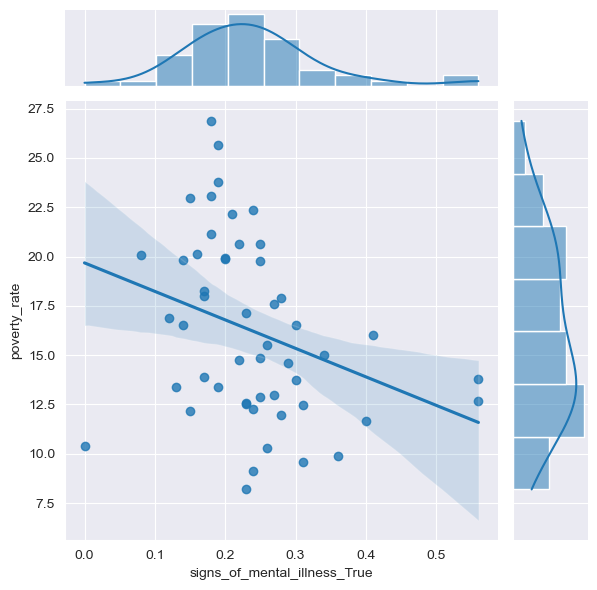

In [72]:
sns.jointplot(x=df_all["signs_of_mental_illness_True"],
              y=df_all[ls[0]],
              kind="reg",
              data=df_all)
corr_coeff_2col(df_all, "signs_of_mental_illness_True",
                "poverty_rate").round(2)

There is a slight dependence on average between the % of homicides of people who suffered from mental illness and the number of white residents in a state, while this ratio is negative for black people.

## Danger indicators

In [73]:

m6 = folium.Map(location=[48, -102], zoom_start=3)

choroplet_generator(df_all, "threat_level_attack", m6, "Direct attack",
                    "% of cases of direct attacks on policemen (0.0 - 1)",
                    "Reds", 9)
choroplet_generator(
    df_all, "threat_level_other", m6, "Indirect attack",
    "% of cases of indirect attacks on policemen (0.0 - 1)", "Oranges", 9)

folium.LayerControl().add_to(m6)
m6

0.28

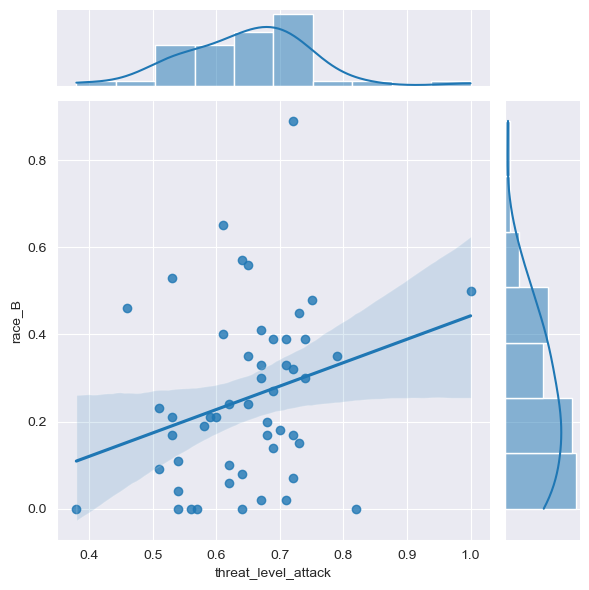

In [74]:
sns.jointplot(x="threat_level_attack", y="race_B", kind="reg", data=df_all)
corr_coeff_2col(df_all, "threat_level_attack", "race_B").round(2)

-0.25

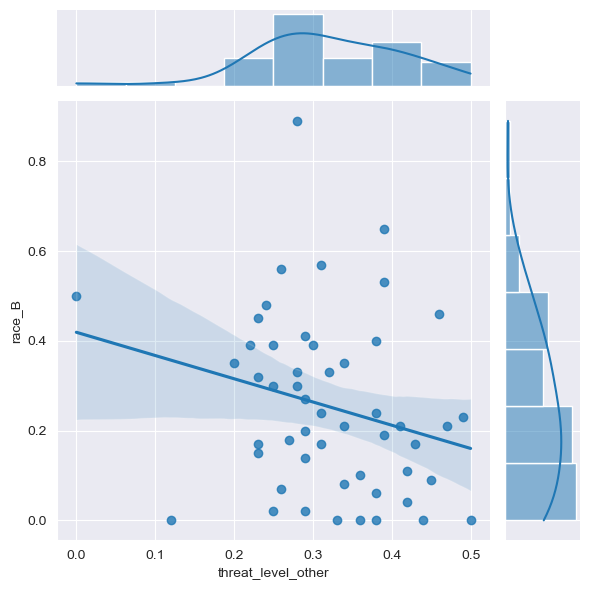

In [75]:
sns.jointplot(x="threat_level_other", y="race_B", kind="reg", data=df_all)
corr_coeff_2col(df_all, "threat_level_other", "race_B").round(2)

From the graphs it would appear that as the number of dead black people increased there were more police officers who fired because they felt directly threatened by the victim. 

-0.23

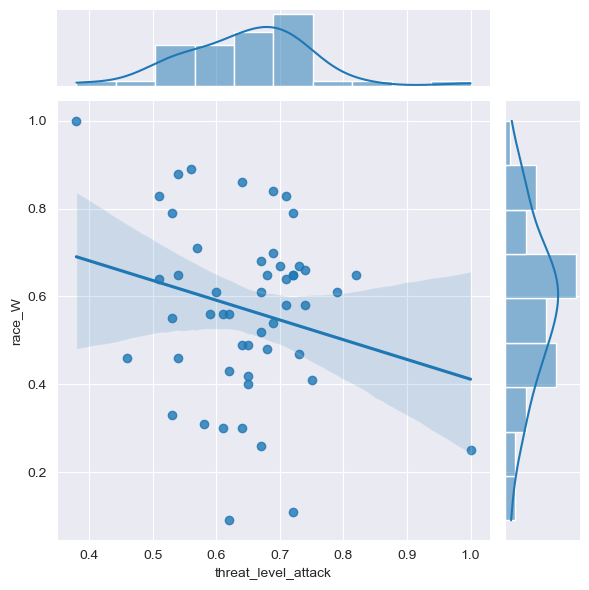

In [76]:
sns.jointplot(x="threat_level_attack", y="race_W", kind="reg", data=df_all)
corr_coeff_2col(df_all, "threat_level_attack", "race_W").round(2)

In fact if we notice the same parameter calculated on white people is lower, this could mean that law enforcement sees black people a greater danger than white people.

# Conclusions.
From the study we learned in America about 7451 people lost their lives between 2015 and 2022 to law enforcement.

The average age of the victims was 36 years old. 

Ninety-five percent of these victims were men and 5% were women.

Fifty-seven percent of the victims were of white ethnicity, 25% black, 12% Hispanic, 4% Native American, and 2% Asian.

Whites occupy uprepresent a larger share of the population on U.S. soil than other ethnicities, the highest concentration being in the northeastern states, while for blacks the states with the highest concentration are the southeastern states.

The data also show that whites and Asians hold much more wealth than blacks and Native Americans, the latter manifested in higher average annual wages and education rates, as wealth is positively correlated with this other data.

Salient fact is that the number of deaths increases as poverty rate increases, in fact the two data are directly correlated with each other with value 0.28 BUT there is no dependence between poverty rate and homicides of black people.

There is a slight dependence on average between the % of homicides of people who suffered from mental illness and the number of white residents in a state, while this relationship is negative for black people.

There is a slight correlation between the number of black people who died per state and the % of cases in which police officers felt particularly at risk. (This finding could be an indicator of police discrimination against blacks.)